## Point 1

### Point 1.a

As seen in the theory, if we suppose a uniform prior for $\mu$, we get a posterior in the form:<br><br>
$ P(\mu | {y_{i}}) \propto \mu^{\sum{y_{i}}} e^{-n\mu}$<br><br>
By using the values we have we get:<br><br>
$ P(\mu | {y_{i}}) \propto \mu^{17} e^{-6\mu}$<br><br>

The formulas for the mean, median and variance in the case of a Gamma $(\alpha,\lambda)$ prior are:<br><br>
Mean: $E[\mu | y] = \frac{\alpha'}{\lambda'}$<br><br>
Median: <br><br>
Variance: $Var[\mu | y] = \frac{\alpha'}{{\lambda'}^2}$<br><br>
Where $\alpha' = \alpha + \sum{y}$ and $\lambda' = \lambda + n$<br><br>
In this case (uniform prior: $\alpha = 1, \lambda = 0$):<br><br>
Mean: $\frac{18}{6}=3$<br><br>
Median: <br><br>
Variance: $\frac{18}{36}=0.5$ 

In [1]:
#defining parameters
data<-c(4,1,3,1,5,3)
n<-length(data)
mu <- seq(0,10,0.1)

In [2]:
#defining uniform prior posterior
prior_uniform<-dunif(mu,min = min(mu),max = max(mu))/sum(dunif(mu,min = min(mu),max = max(mu)))
likelihood<-dpois(sum(data),mu*n) 
norm<-sum(prior_uniform*likelihood)
posterior_uniform<-likelihood*prior_uniform/norm

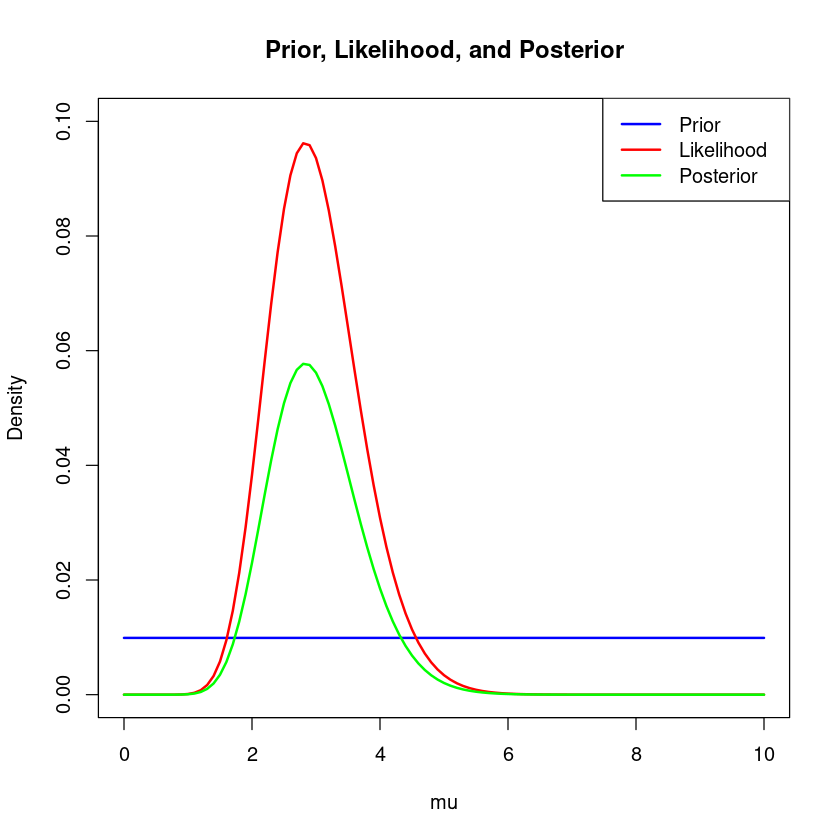

In [3]:
#plotting uniform prior and posterior
plot(mu, prior_uniform, type = "l", col = "blue", lwd = 2, xlab = "mu", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.1))
lines(mu, likelihood, col = "red", lwd = 2)
lines(mu, posterior_uniform, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

In [4]:
# calculating the mean,variance and median numerically
numerical_mean<-sum(mu*posterior_uniform)
print(paste("The numerical mean of the distribution is: ", numerical_mean))
numerical_var<-sum((mu**2)*posterior_uniform) - numerical_mean**2
print(paste("The numerical variance of the distribution is: ", numerical_var))
numerical_median_uniform<-cumsum(posterior_uniform)
print(paste("The numerical median of the distribution is: ", mu[which.min(abs(numerical_median_uniform-0.5))]))

[1] "The numerical mean of the distribution is:  2.99999999966475"
[1] "The numerical variance of the distribution is:  0.499999997579458"
[1] "The numerical median of the distribution is:  2.9"


### Point 1.b

In [5]:
#do the same for a gamma prior
exp_value<-3
std<-1
theta<-std/exp_value
k<-exp_value/theta


prior_gamma<-dgamma(mu,shape=k,scale=theta)
likelihood<-dpois(sum(data),mu*n) 
norm<-sum(prior_gamma*likelihood)
posterior_gamma<-likelihood*prior_gamma/norm

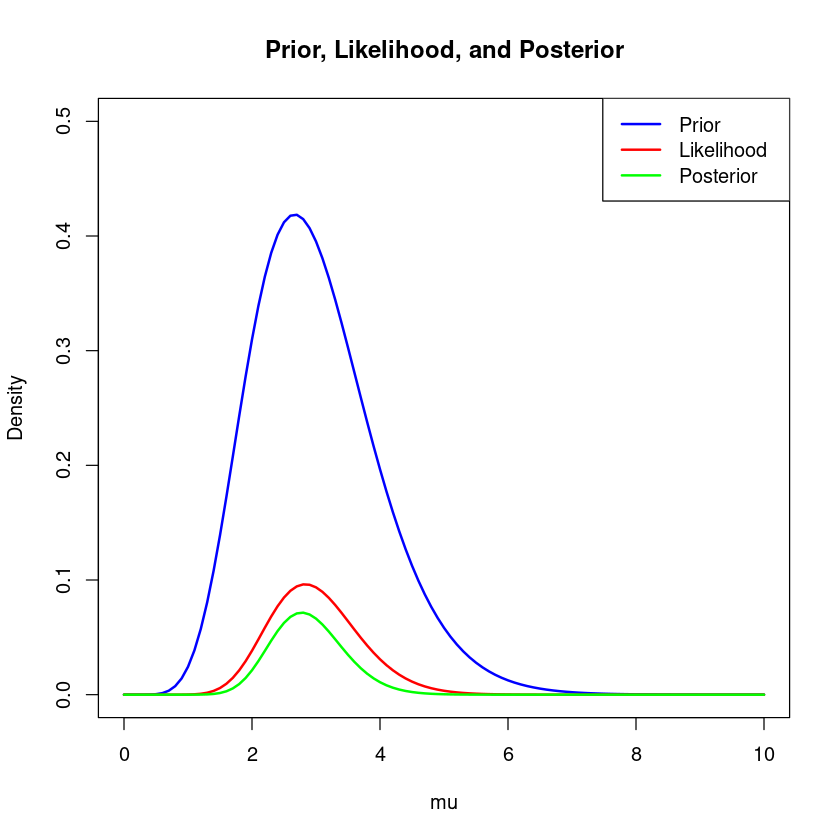

In [6]:
#plotting uniform prior and posterior
plot(mu, prior_gamma, type = "l", col = "blue", lwd = 2, xlab = "mu", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.5))
lines(mu, likelihood, col = "red", lwd = 2)
lines(mu, posterior_gamma, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

In [7]:
# calculating the mean,variance and median numerically
numerical_mean<-sum(mu*posterior_gamma)
print(paste("The numerical mean of the distribution is: ", numerical_mean))
numerical_var<-sum((mu**2)*posterior_gamma) - numerical_mean**2
print(paste("The numerical variance of the distribution is: ", numerical_var))
numerical_median_gamma<-cumsum(posterior_gamma)
print(paste("The numerical median of the distribution is: ", mu[which.min(abs(numerical_median_gamma-0.5))]))

[1] "The numerical mean of the distribution is:  2.88888888888889"
[1] "The numerical variance of the distribution is:  0.320987654320968"
[1] "The numerical median of the distribution is:  2.8"


### Point 1.c

In [8]:
cat("A 95% confidence interval in the distribution with uniform prior is the one spanning:\t",mu[which.min(abs(numerical_median_uniform-0.025))],"-",mu[which.min(abs(numerical_median_uniform-0.975))])
cat("\n")
cat("A 95% confidence interval in the distribution with gamma prior is the one spanning:\t",mu[which.min(abs(numerical_median_gamma-0.025))],"-",mu[which.min(abs(numerical_median_gamma-0.975))])
cat("\n")
cumnorm<-cumsum(dnorm(mu,mean = exp_value,sd = std)/sum(dnorm(mu,mean = exp_value,sd = std)))
cat("A 95% confidence interval in a gaussian distribution is the one spanning:\t\t", mu[which.min(abs(cumnorm-0.025))],"-",mu[which.min(abs(cumnorm-0.975))])

A 95% confidence interval in the distribution with uniform prior is the one spanning:	 1.7 - 4.5
A 95% confidence interval in the distribution with gamma prior is the one spanning:	 1.8 - 4.1
A 95% confidence interval in a gaussian distribution is the one spanning:		 1 - 4.9

## Ex2

In [9]:
#data
n=500
r=312
y=seq(0,1,0.001)

### Point 2.a,2.b

In [10]:
prior<-dunif(y,min=0,max=1)/sum(dunif(y,min=0,max=1))
likelihood<-dbinom(r,size = n,prob = y)
norm<-sum(prior*likelihood)
posterior<-prior*likelihood/norm

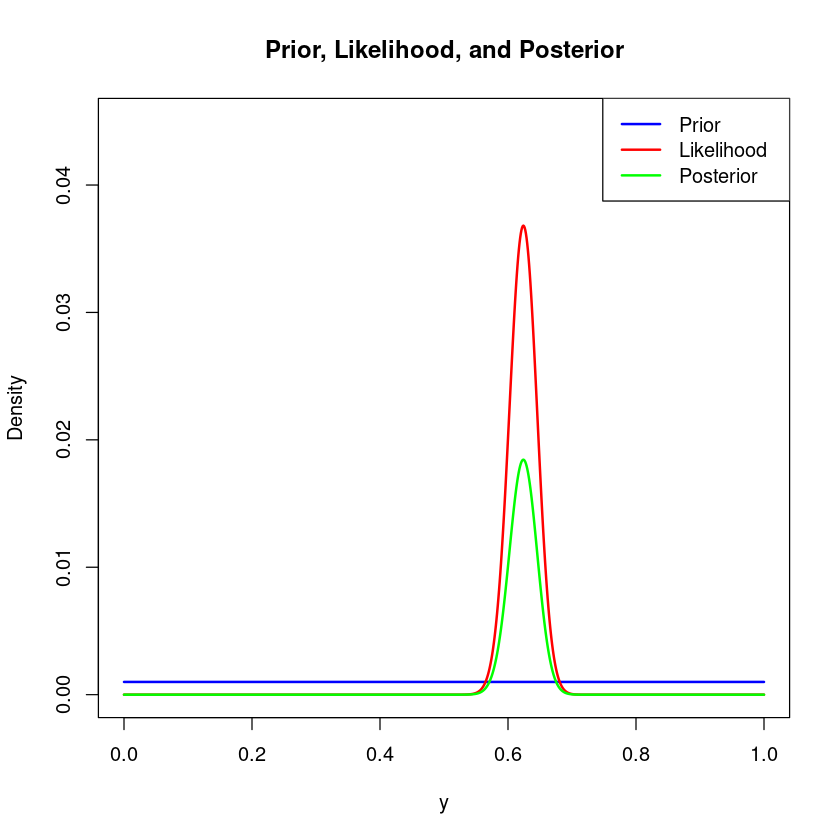

In [11]:
#plotting uniform prior and posterior
plot(y, prior, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.045))
lines(y, likelihood, col = "red", lwd = 2)
lines(y, posterior, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

In [12]:
# calculating the mean,variance and median numerically
numerical_mean<-sum(y*posterior)
print(paste("The numerical mean of the number of recorded events from Det2 is: ", numerical_mean*n))
print(paste("The numerical mean of the distribution is: ", numerical_mean))
numerical_var<-sum((y**2)*posterior) - numerical_mean**2
print(paste("The numerical variance of the number of recorded events from Det2 is: ", numerical_var*n**2))
print(paste("The numerical variance of the distribution is: ", numerical_var))

[1] "The numerical mean of the number of recorded events from Det2 is:  311.752988047809"
[1] "The numerical mean of the distribution is:  0.623505976095618"
[1] "The numerical variance of the number of recorded events from Det2 is:  116.673098344261"
[1] "The numerical variance of the distribution is:  0.000466692393377044"


In [13]:
y<-y[-1]
y<-y[-length(y)]
#print(y)
prior_beta<-dbeta(y,shape1 = 1/2,shape2 = 1/2)/sum(dbeta(y,shape1 = 1/2,shape2 = 1/2))
likelihood<-dbinom(r,size = n,prob = y)
norm<-sum(prior_beta*likelihood)
posterior<-prior_beta*likelihood/norm

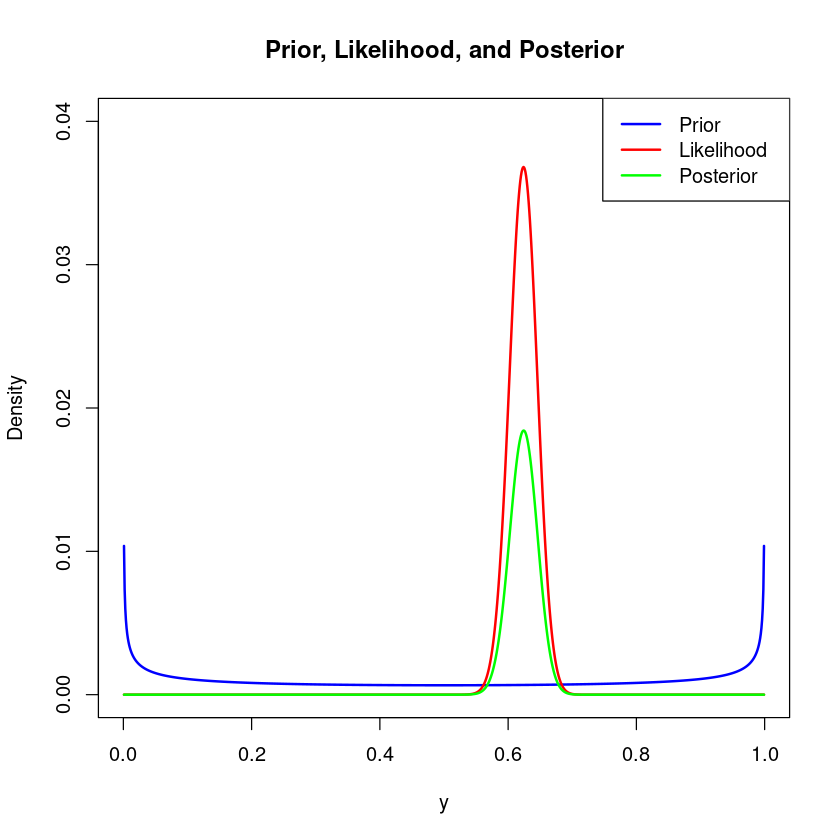

In [14]:
#plotting uniform prior and posterior
plot(y, prior_beta, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.04))
lines(y, likelihood, col = "red", lwd = 2)
lines(y, posterior, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

In [15]:
# calculating the mean,variance and median numerically
numerical_mean<-sum(y*posterior)
print(paste("The numerical mean of the number of recorded events from Det2 is: ", numerical_mean*n))
print(paste("The numerical mean of the distribution is: ", numerical_mean))
numerical_var<-sum((y**2)*posterior) - numerical_mean**2
print(paste("The numerical variance of the number of recorded events from Det2 is: ", numerical_var*n**2))
print(paste("The numerical variance of the distribution is: ", numerical_var))

[1] "The numerical mean of the number of recorded events from Det2 is:  311.87624750499"
[1] "The numerical mean of the distribution is:  0.62375249500998"
[1] "The numerical variance of the number of recorded events from Det2 is:  116.875159352006"
[1] "The numerical variance of the distribution is:  0.000467500637408025"


### Point c

In [16]:
#data
n_b=10
r_b=10
y=seq(0,1,0.001)

In [17]:
prior_b<-dunif(y,min=0,max=1)/sum(dunif(y,min=0,max=1))
likelihood_b<-dbinom(r_b,size = n_b,prob = y)
norm_b<-sum(prior_b*likelihood_b)
posterior_b<-prior_b*likelihood_b/norm_b

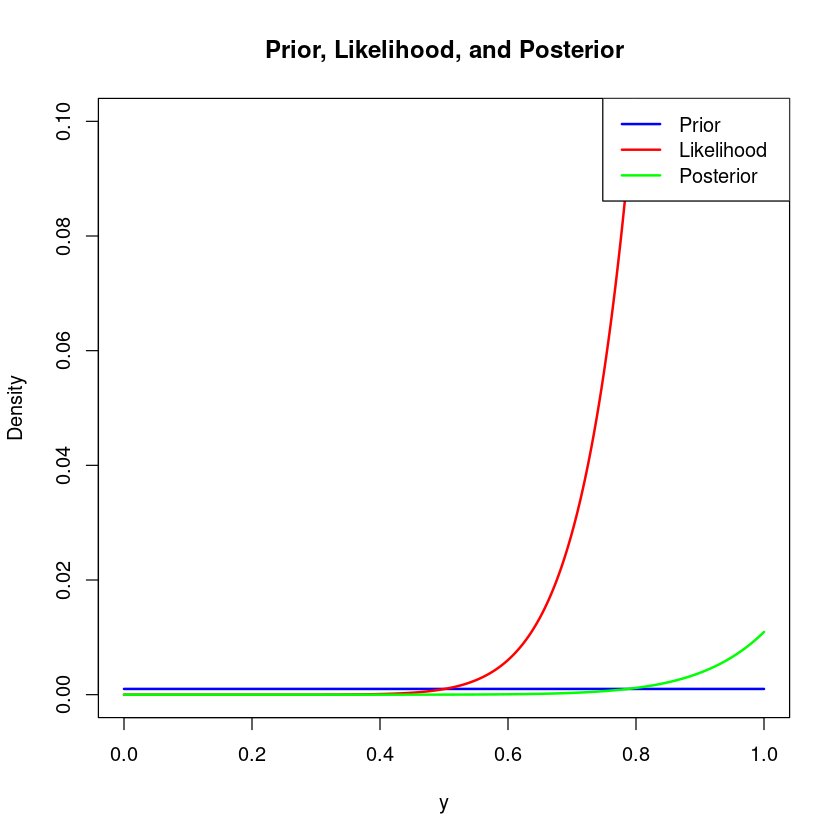

In [18]:
#plotting uniform prior and posterior
plot(y, prior_b, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.1))
lines(y, likelihood_b, col = "red", lwd = 2)
lines(y, posterior_b, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

In [19]:
# calculating the mean,variance and median numerically
numerical_mean<-sum(y*posterior_b)
print(paste("The numerical mean of the number of recorded events from Det2 is: ", numerical_mean*n))
print(paste("The numerical mean of the distribution is: ", numerical_mean))
numerical_var<-sum((y**2)*posterior_b) - numerical_mean**2
print(paste("The numerical variance of the number of recorded events from Det2 is: ", numerical_var*n**2))
print(paste("The numerical variance of the distribution is: ", numerical_var))

[1] "The numerical mean of the number of recorded events from Det2 is:  458.562080071355"
[1] "The numerical mean of the distribution is:  0.91712416014271"
[1] "The numerical variance of the number of recorded events from Det2 is:  1470.46615704599"
[1] "The numerical variance of the distribution is:  0.00588186462818396"


In [20]:
prior_b<-posterior_b
likelihood<-dbinom(r,size = n,prob = y)
norm<-sum(prior_b*likelihood)
posterior<-prior_b*likelihood/norm

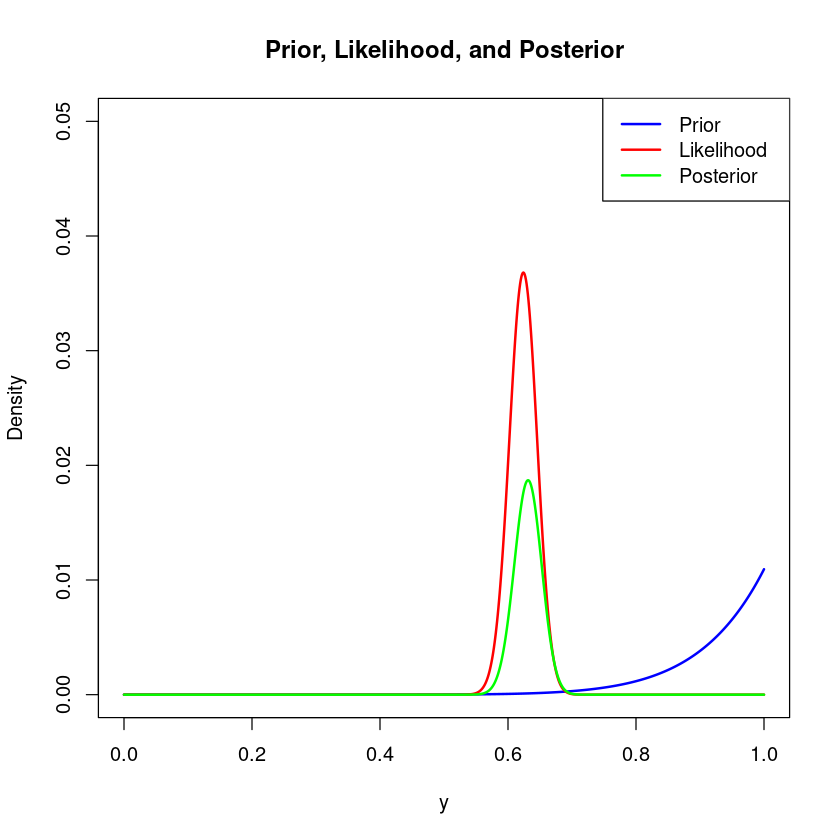

In [21]:
#plotting uniform prior and posterior
plot(y, prior_b, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.05))
lines(y, likelihood, col = "red", lwd = 2)
lines(y, posterior, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

In [22]:
# calculating the mean,variance and median numerically
numerical_mean<-sum(y*posterior)
print(paste("The numerical mean of the number of recorded events from Det2 is: ", numerical_mean*n))
print(paste("The numerical mean of the distribution is: ", numerical_mean))
numerical_var<-sum((y**2)*posterior) - numerical_mean**2
print(paste("The numerical variance of the number of recorded events from Det2 is: ", numerical_var*n**2))
print(paste("The numerical variance of the distribution is: ", numerical_var))

[1] "The numerical mean of the number of recorded events from Det2 is:  315.4296875"
[1] "The numerical mean of the distribution is:  0.630859375"
[1] "The numerical variance of the number of recorded events from Det2 is:  113.487243652344"
[1] "The numerical variance of the distribution is:  0.000453948974609375"


In [23]:
cumsum<-cumsum(posterior)
start<-y[which.min(abs(cumsum-0.025))]
end<-y[which.min(abs(cumsum-0.975))]
cat("The interval of 95% credibility is: ", start,"-",end)

The interval of 95% credibility is:  0.588 - 0.672

# Ex3

### Point 3.a

In [24]:
# data
draws<-c(1,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0)   #1 for tails, 0 for heads
n<-length(draws)
n_heads<-length(draws[draws==0])
n_tails<-n-n_heads
y<-seq(0,1,0.01)

In [25]:
prior_uniform<-dunif(y,min=0,max=n)/sum(dunif(y,min=0,max=n))
prior_beta<-dbeta(y,shape1 = 2 ,shape2 = 2)/sum(dbeta(y,shape1 = 2 ,shape2 = 2))
likelihood<-dbinom(n_heads,size = n,prob = y)
posterior_uniform<-likelihood*prior_uniform/sum(likelihood*prior_uniform)
posterior_beta<-likelihood*prior_beta/sum(likelihood*prior_beta)

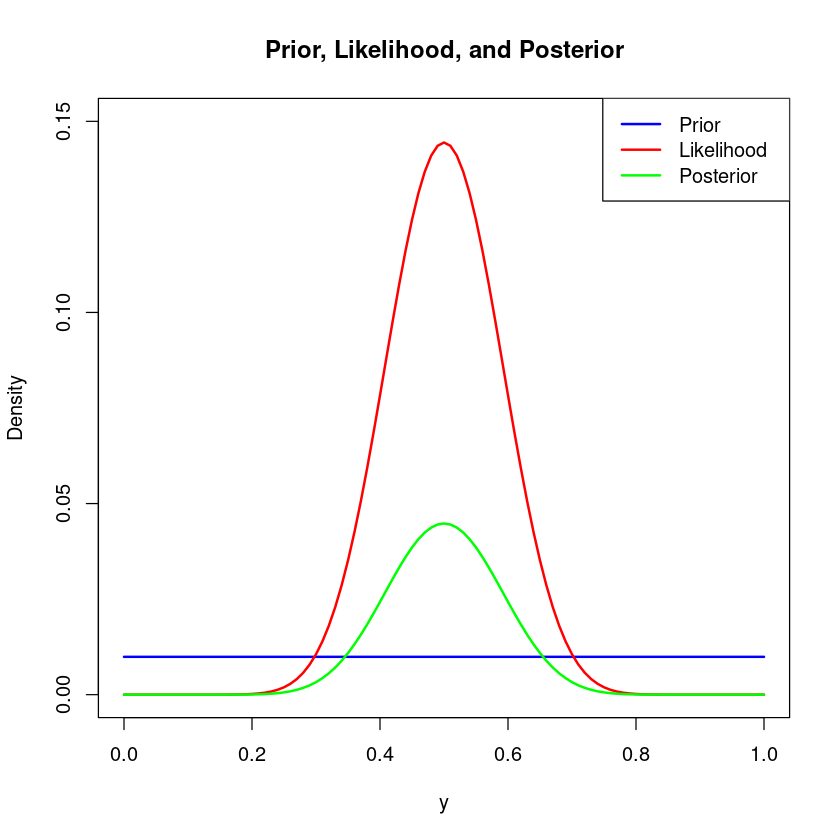

In [26]:
#plotting uniform prior and posterior
plot(y, prior_uniform, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.15))
lines(y, likelihood, col = "red", lwd = 2)
lines(y, posterior_uniform, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

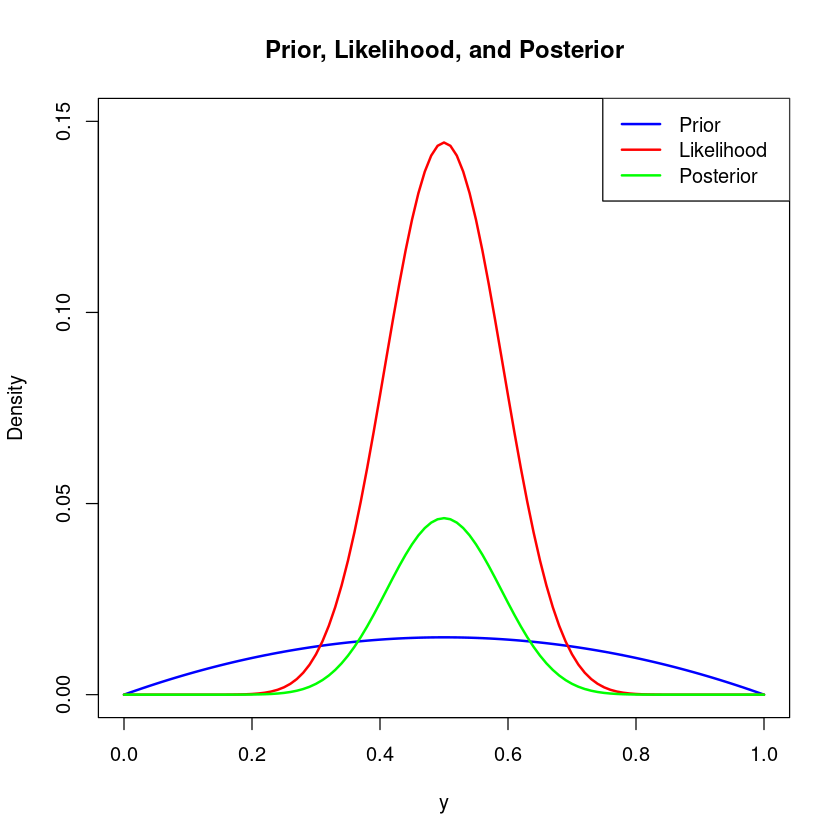

In [27]:
#plotting uniform prior and posterior
plot(y, prior_beta, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.15))
lines(y, likelihood, col = "red", lwd = 2)
lines(y, posterior_beta, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

### Point 3.b

In [28]:
cat("Uniform prior: ",y[which.max(posterior_uniform)])
cumsum<-cumsum(posterior_uniform)
start<-y[which.min(abs(cumsum-0.025))]
end<-y[which.min(abs(cumsum-0.975))]
cat("\tThe interval of 95% credibility for the uniform prior is: ", start,"-",end,"\n")
cat("Beta prior: ",y[which.max(posterior_beta)])
cumsum<-cumsum(posterior_beta)
start<-y[which.min(abs(cumsum-0.025))]
end<-y[which.min(abs(cumsum-0.975))]
cat("\tThe interval of 95% credibility for the beta prior is: ", start,"-",end)

Uniform prior:  0.5	The interval of 95% credibility for the uniform prior is:  0.33 - 0.66 
Beta prior:  0.5	The interval of 95% credibility for the beta prior is:  0.33 - 0.66

### Point 3.c

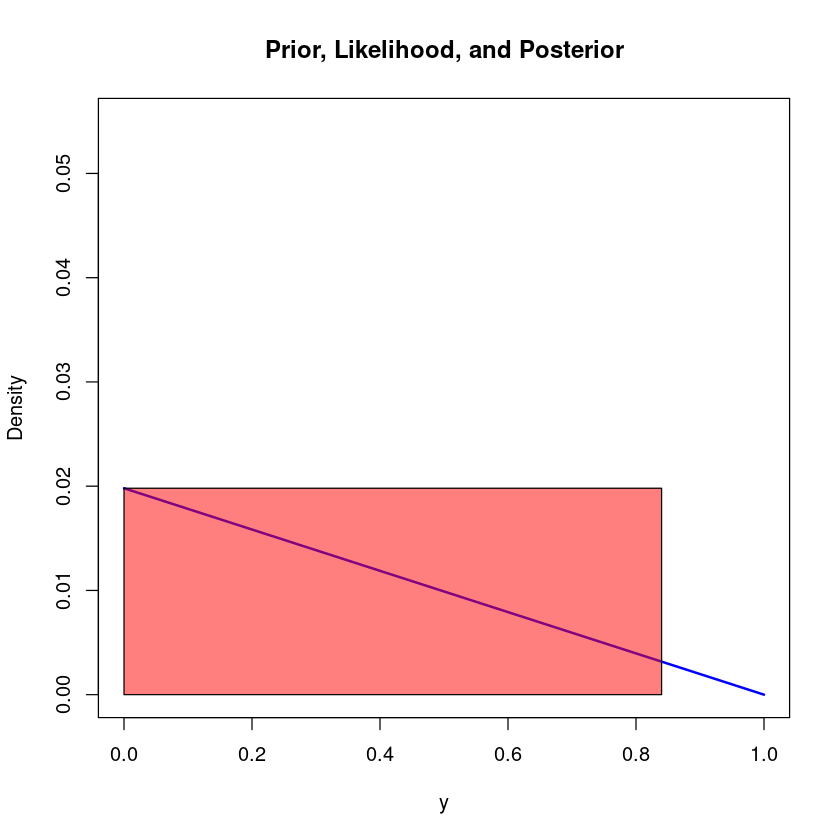

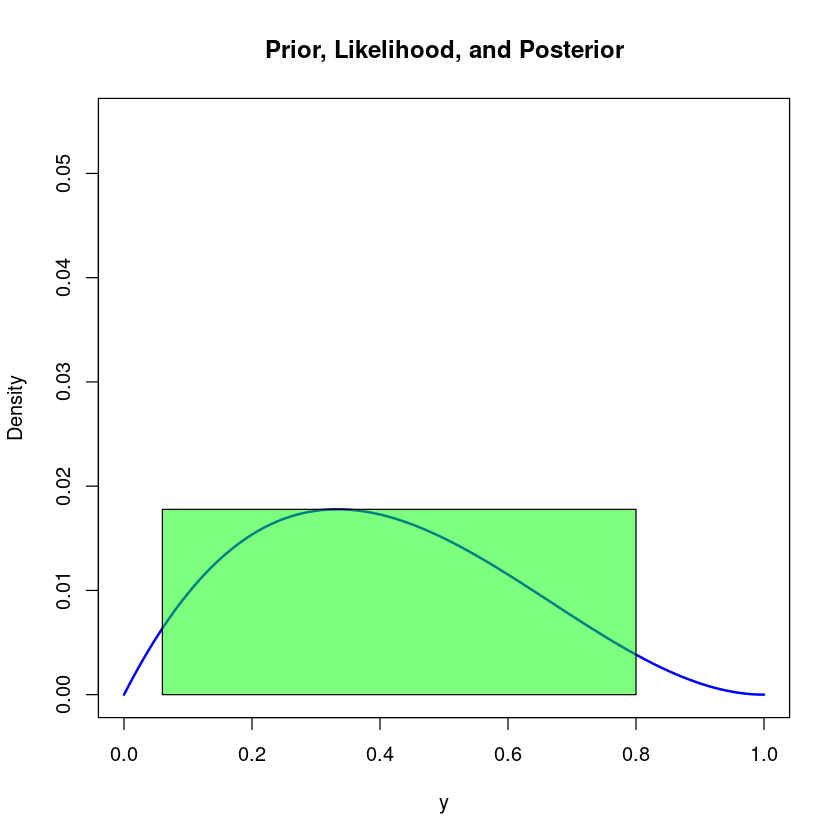

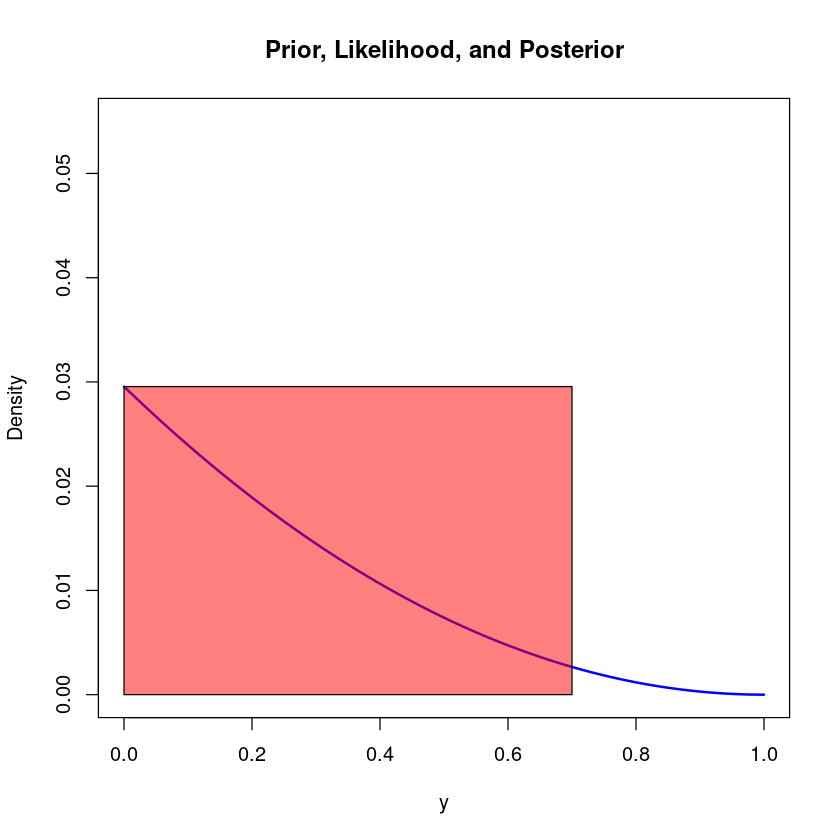

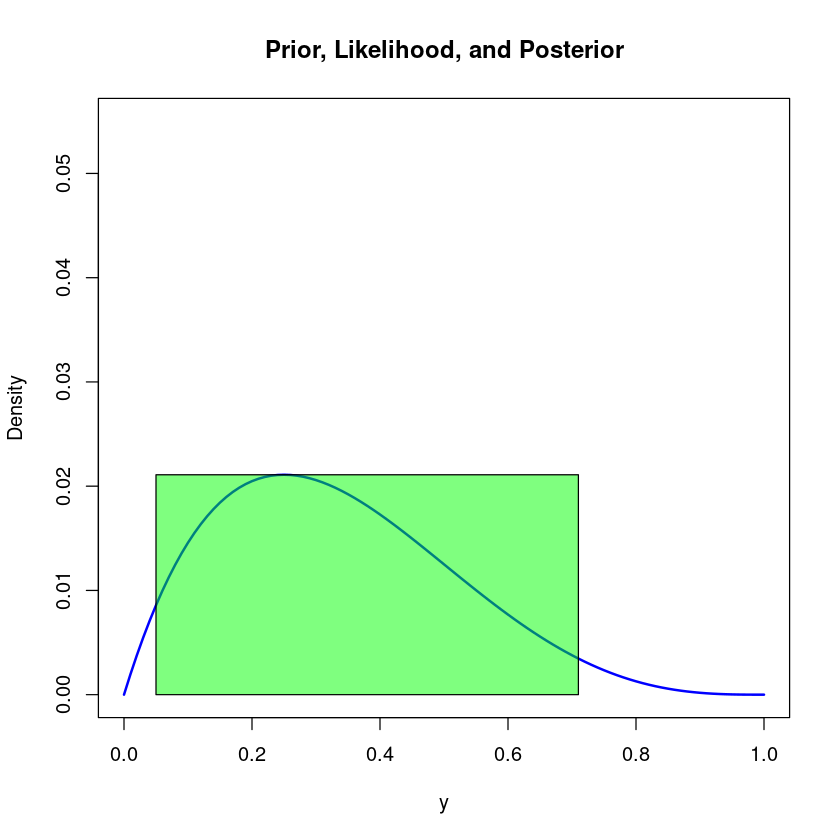

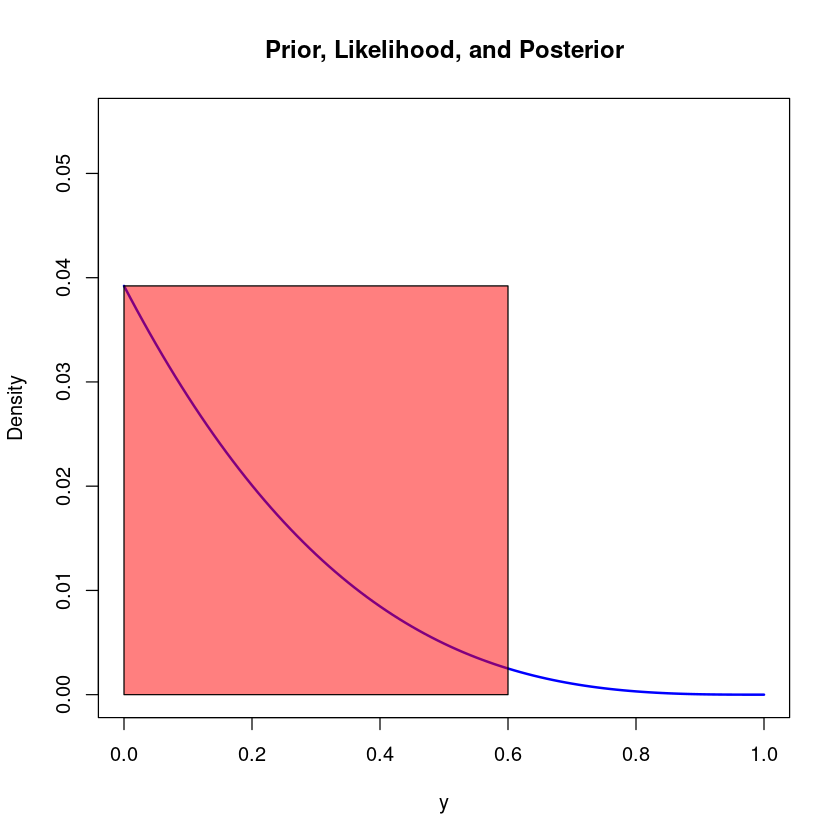

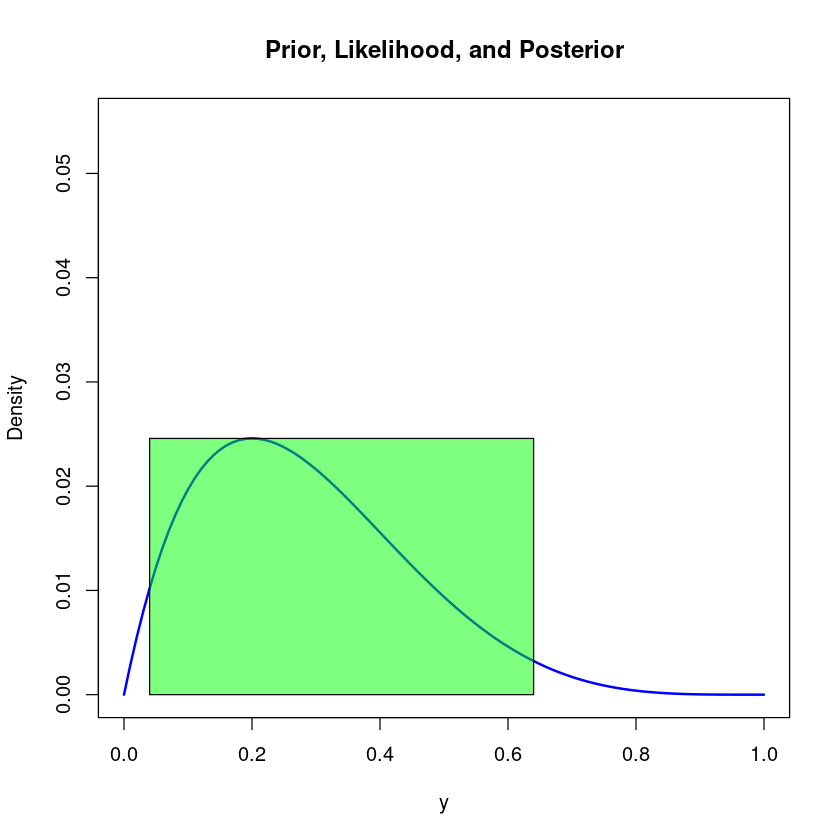

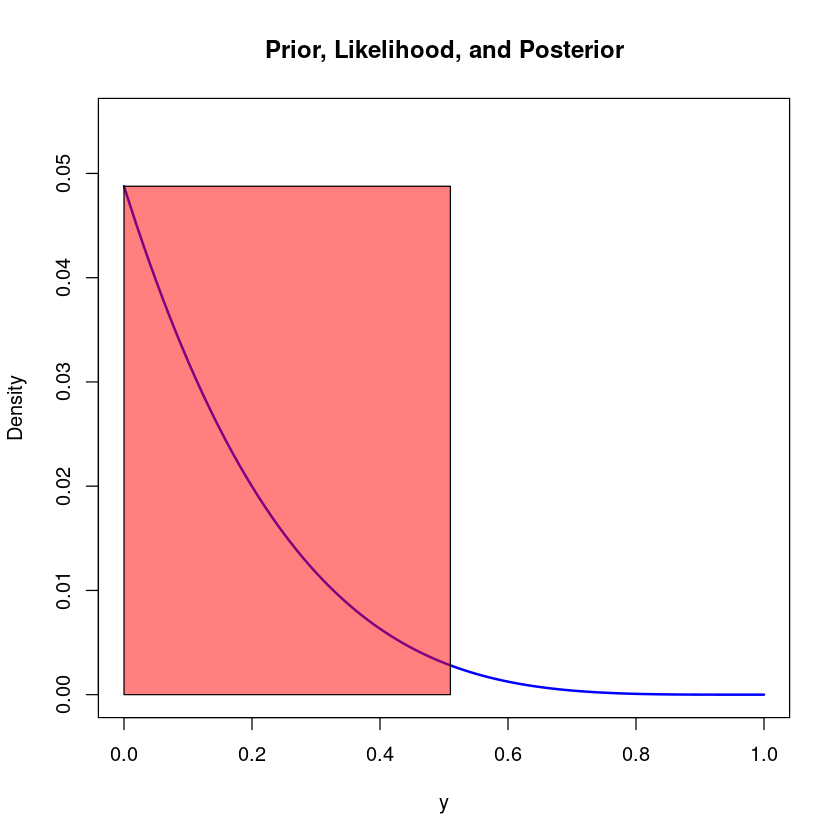

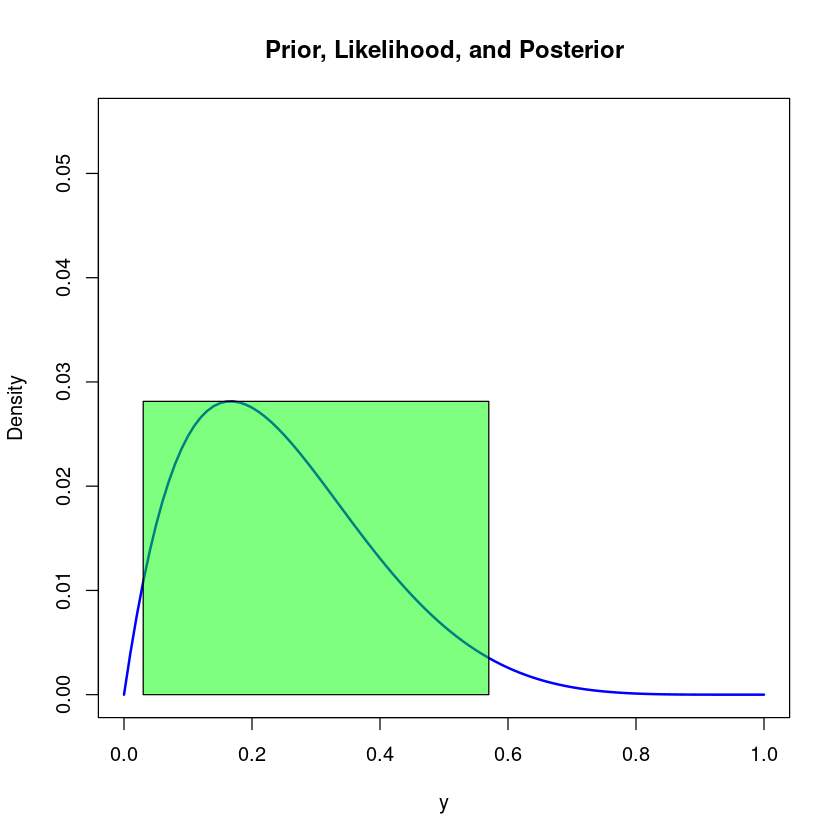

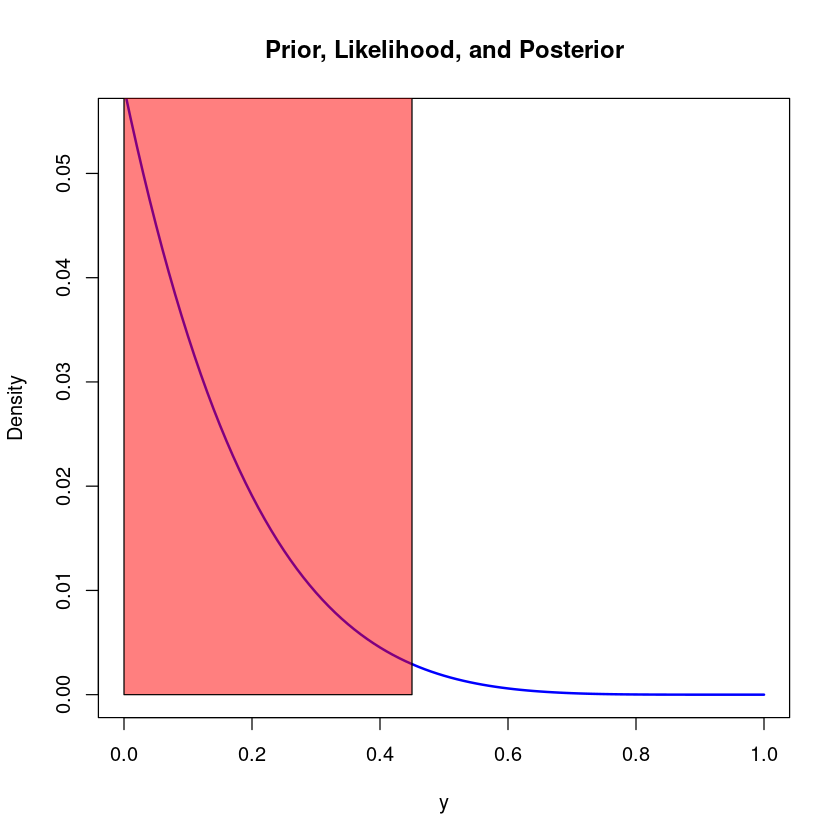

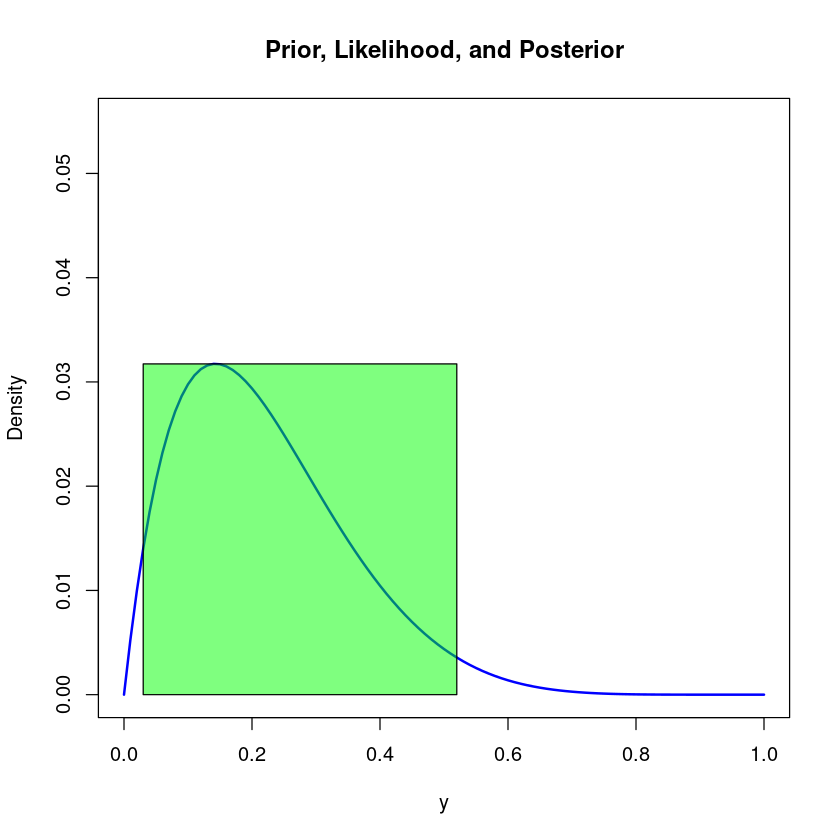

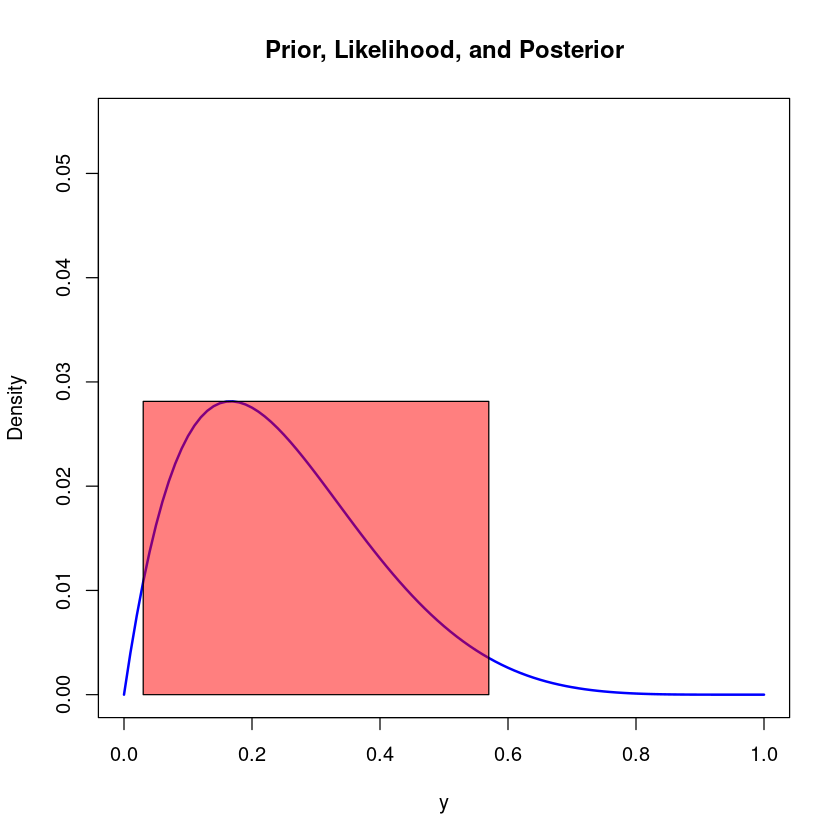

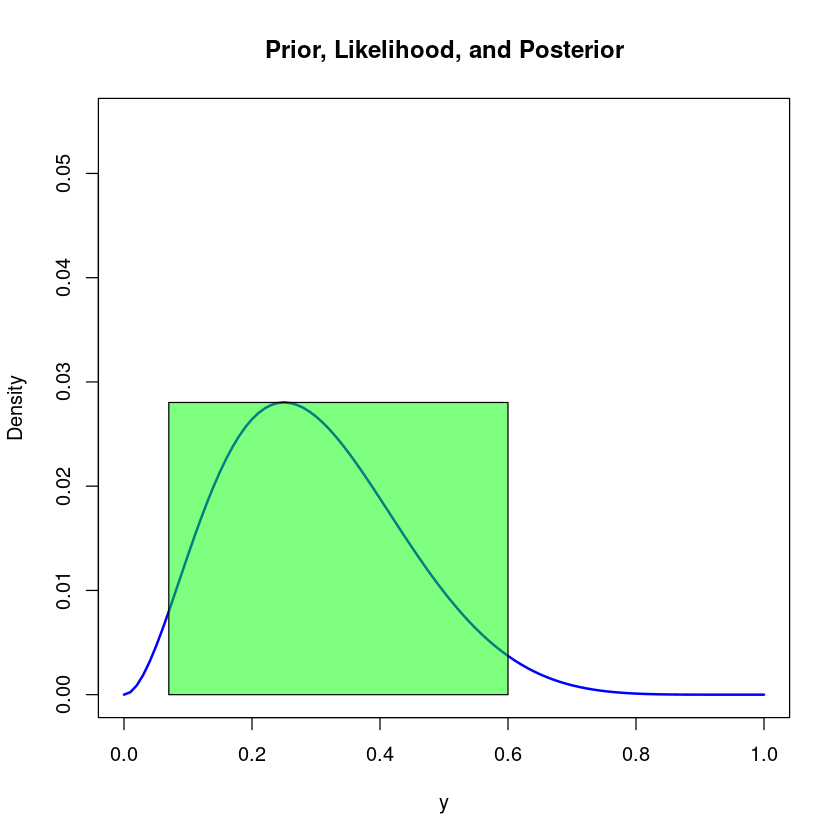

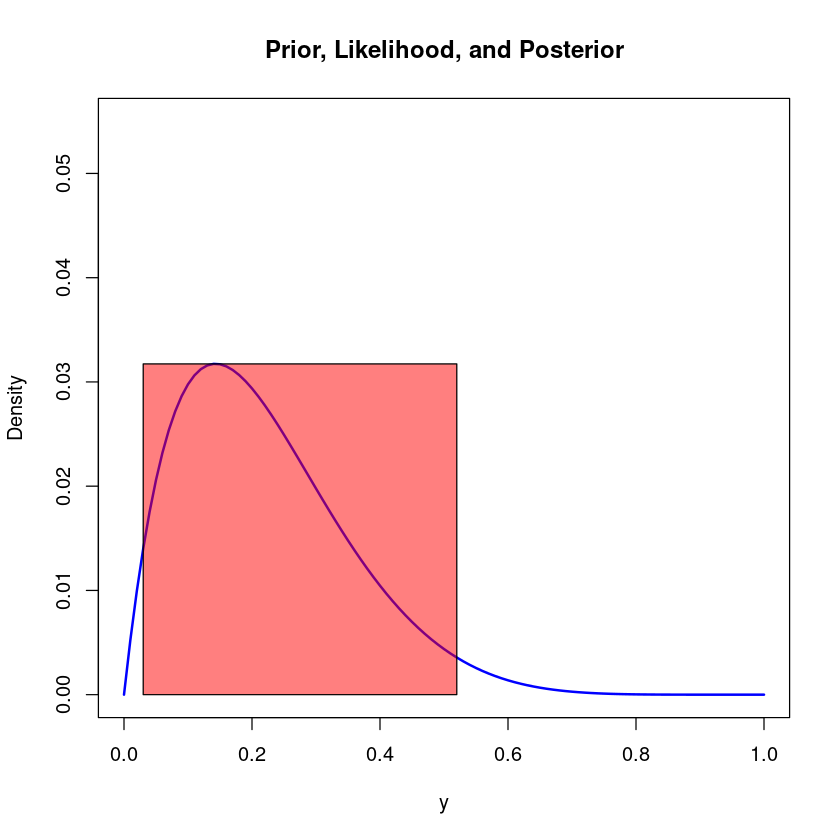

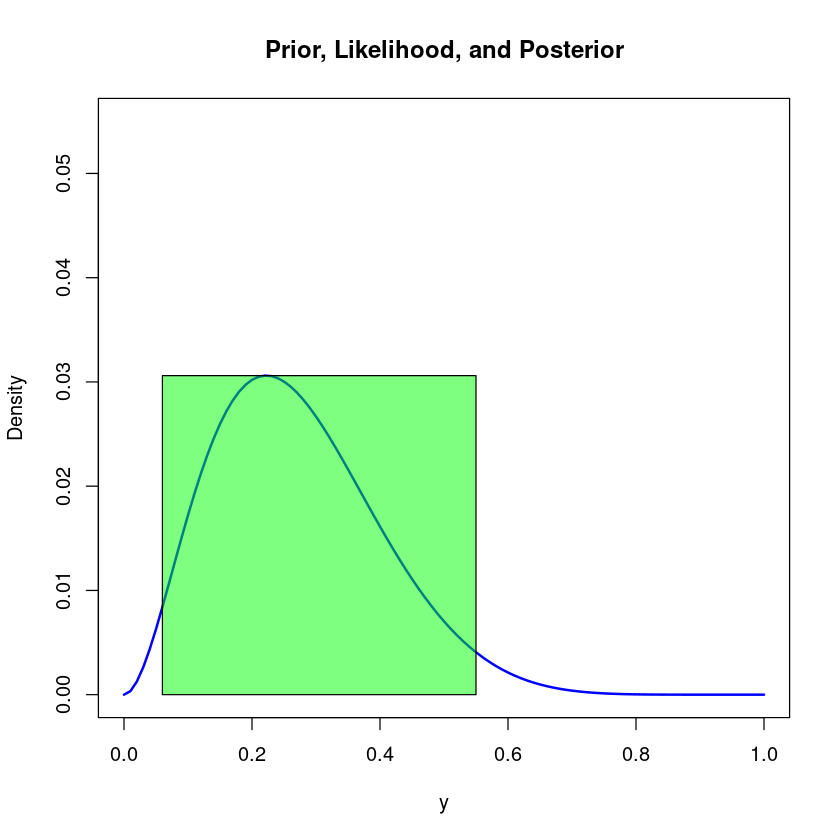

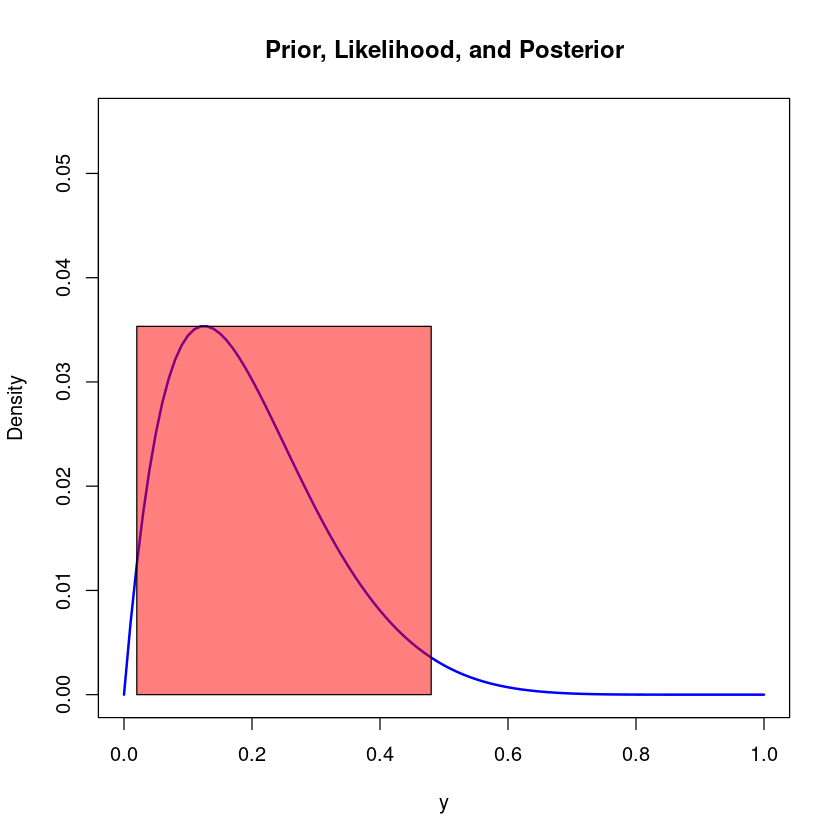

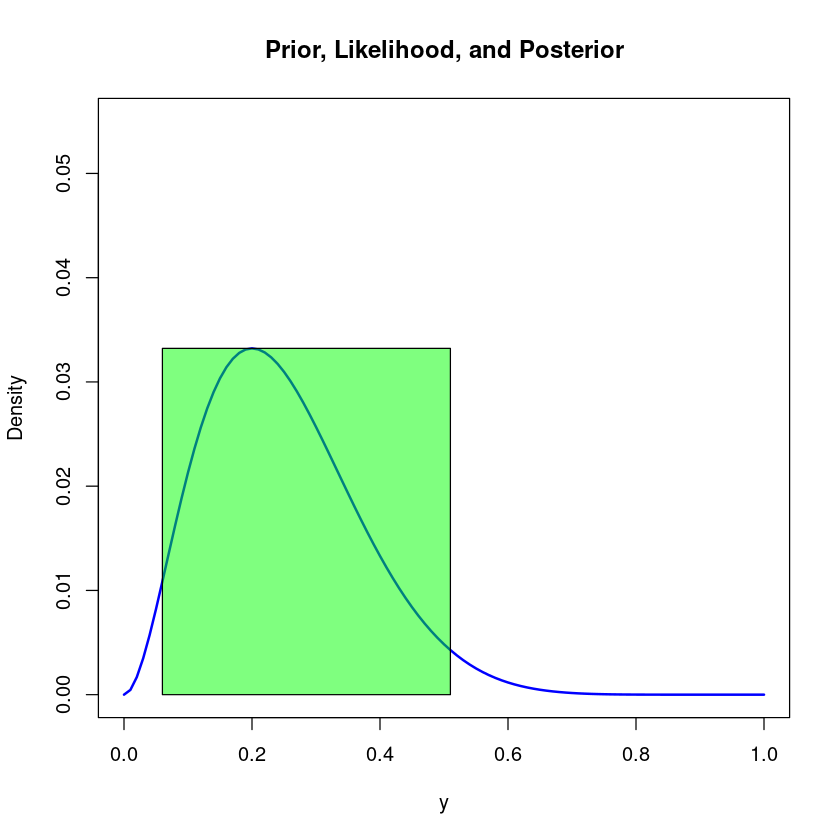

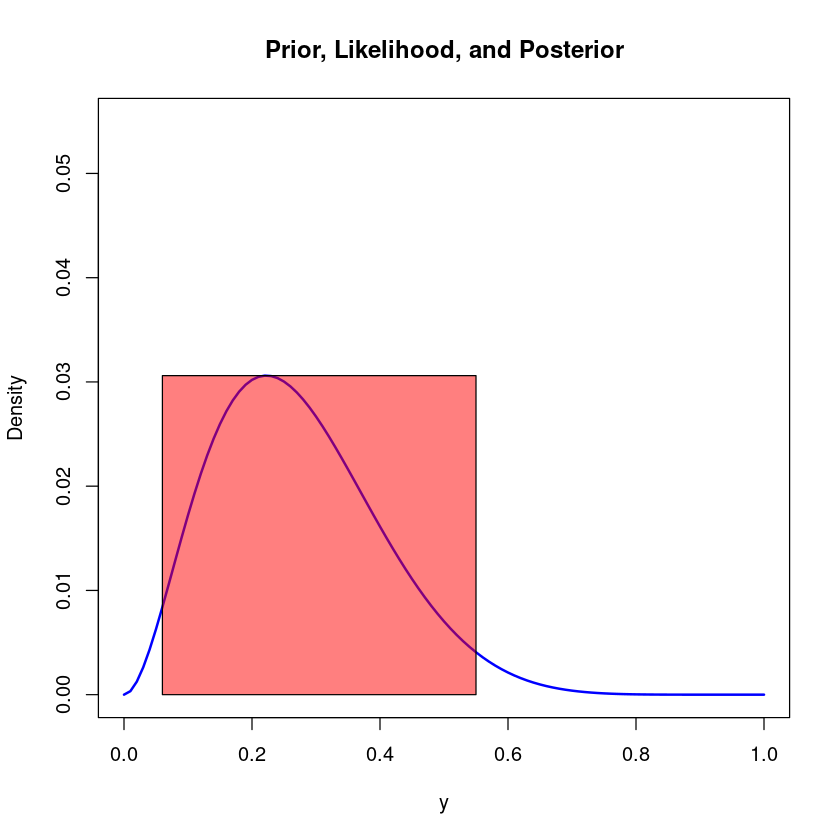

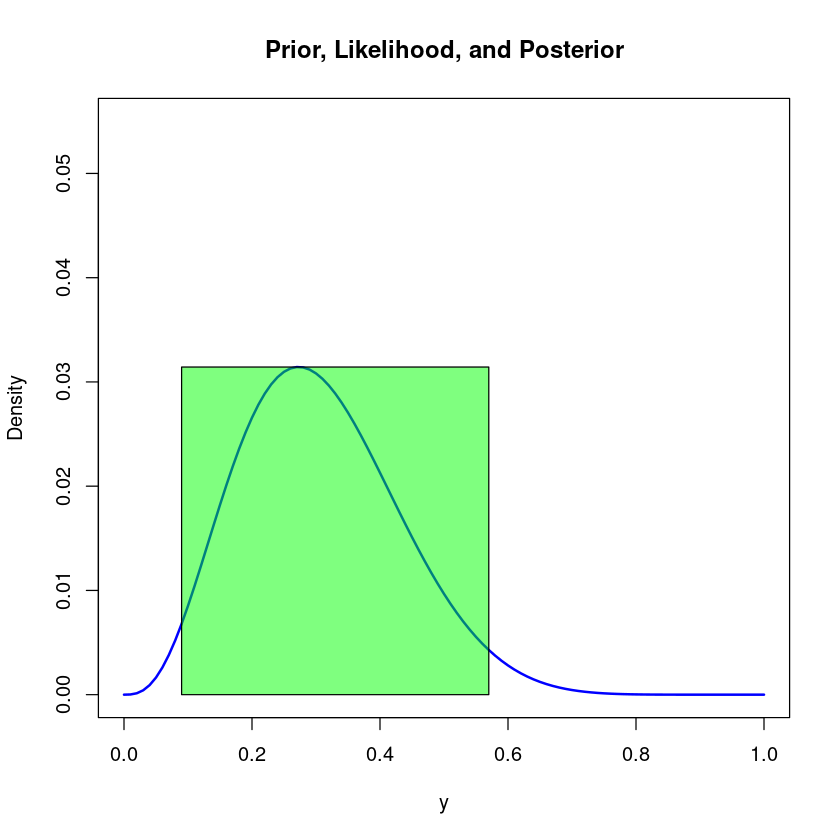

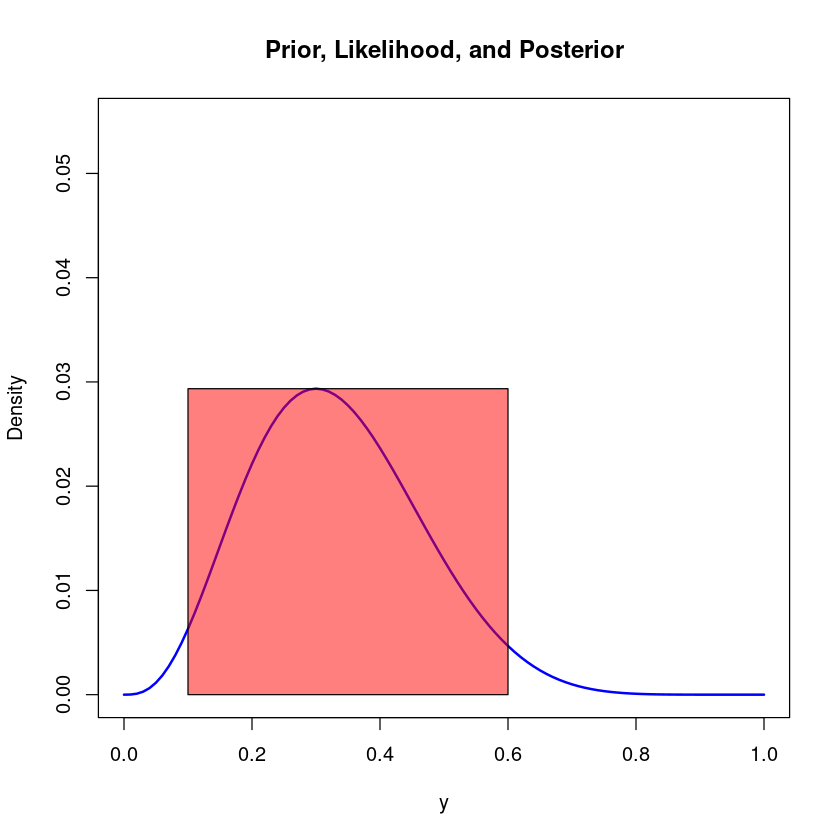

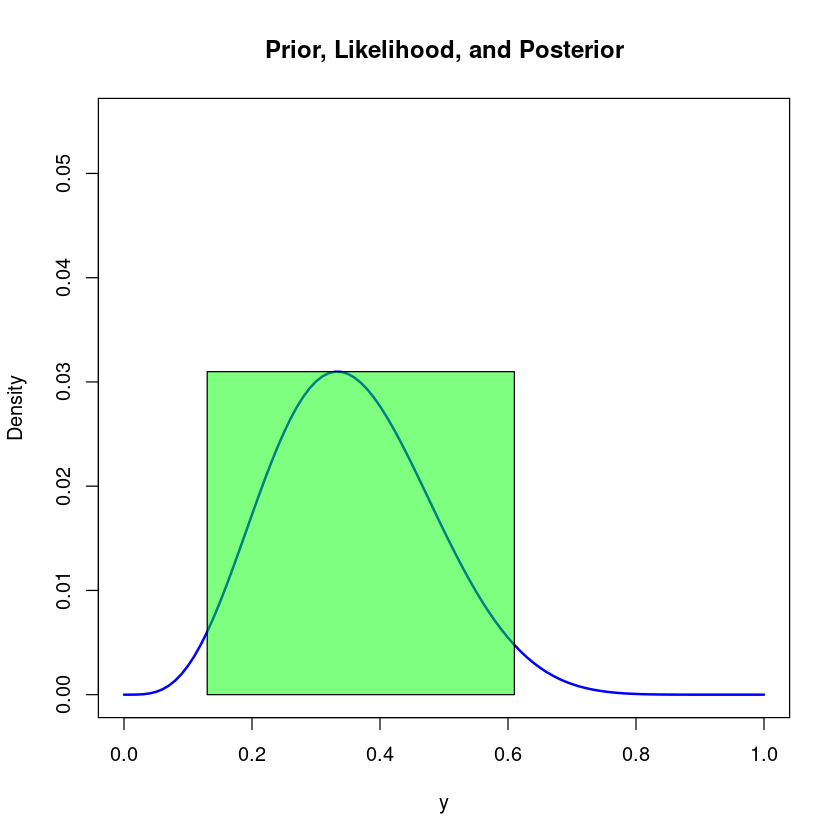

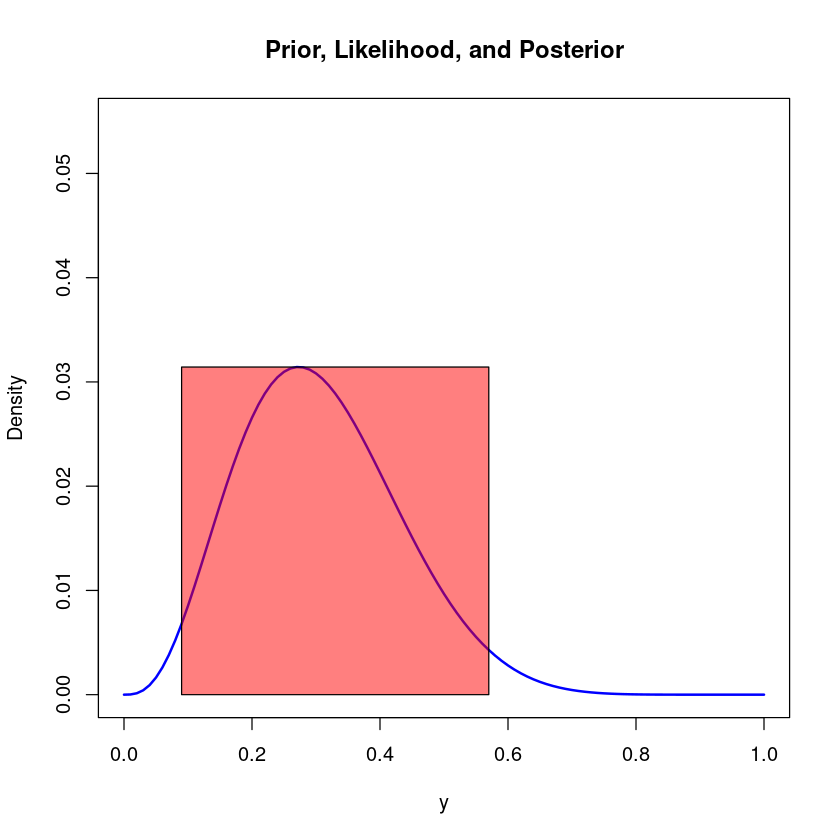

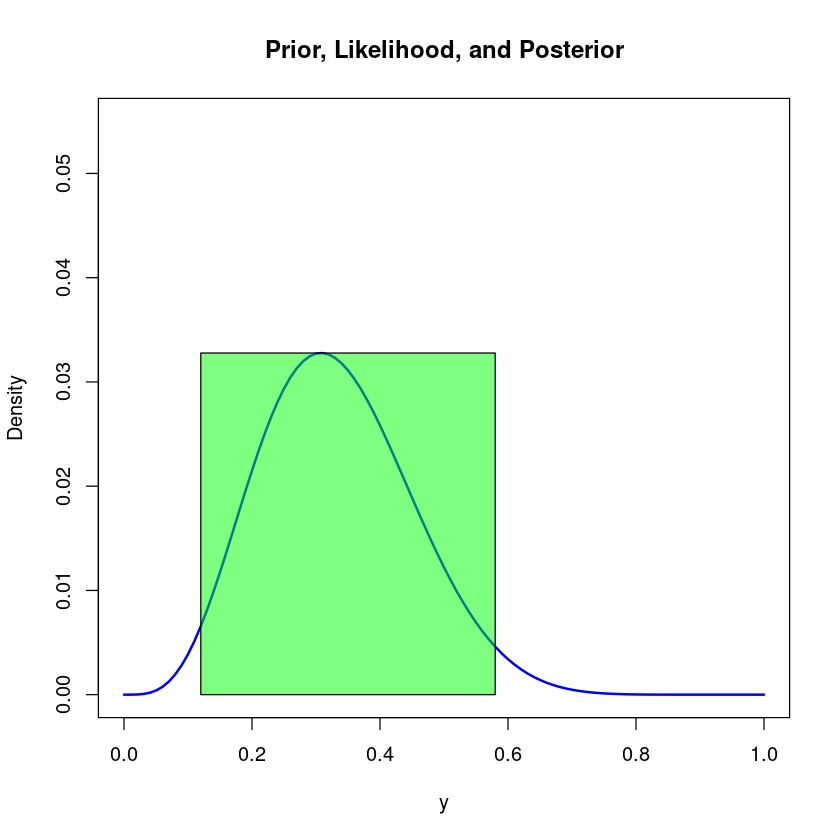

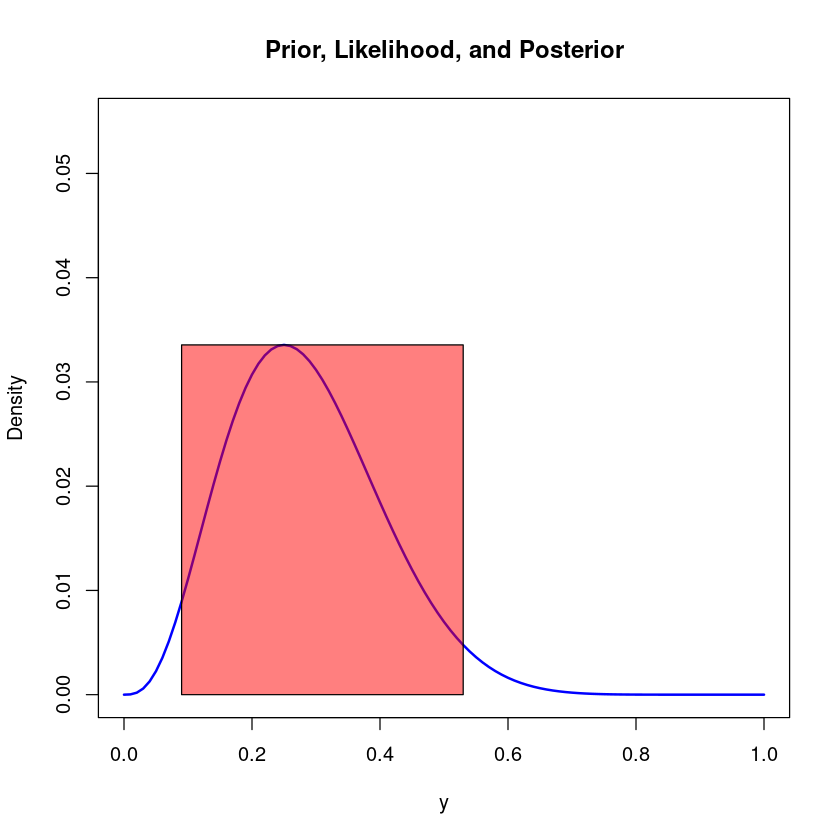

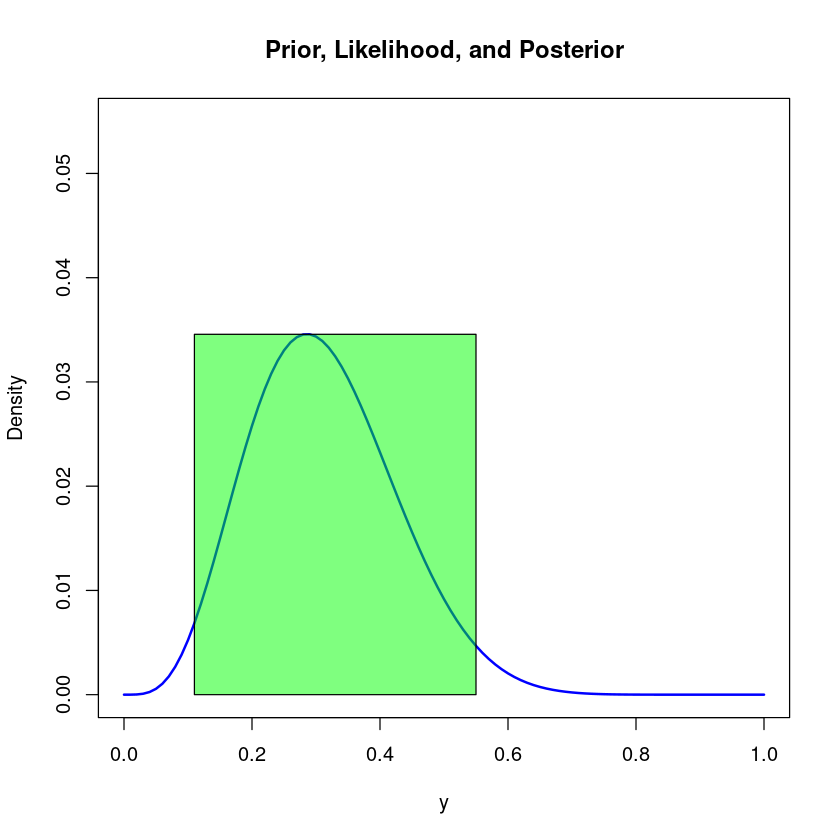

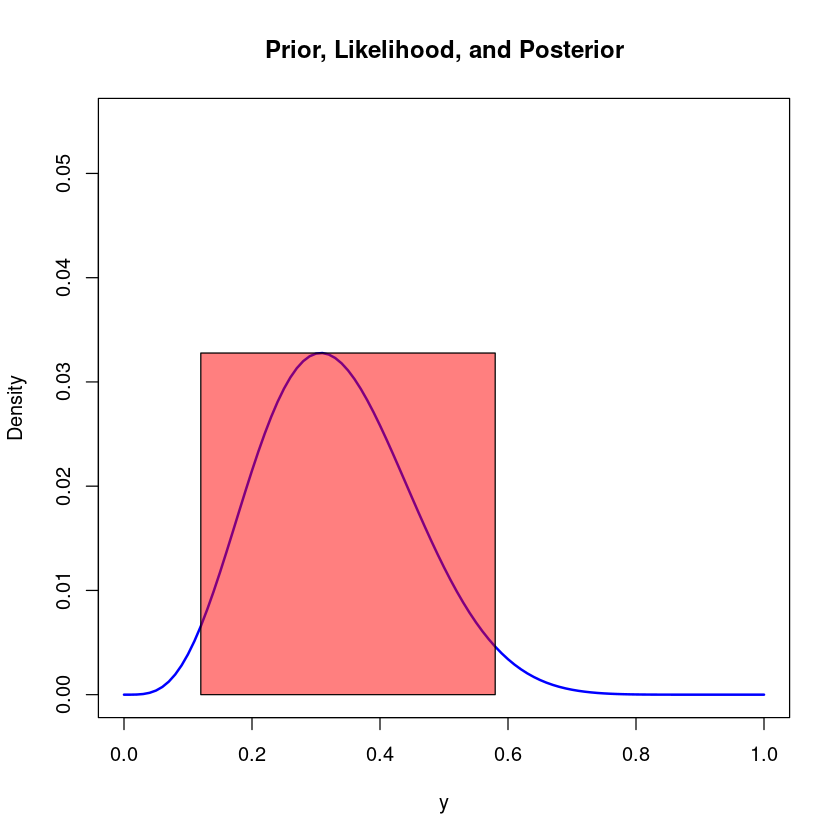

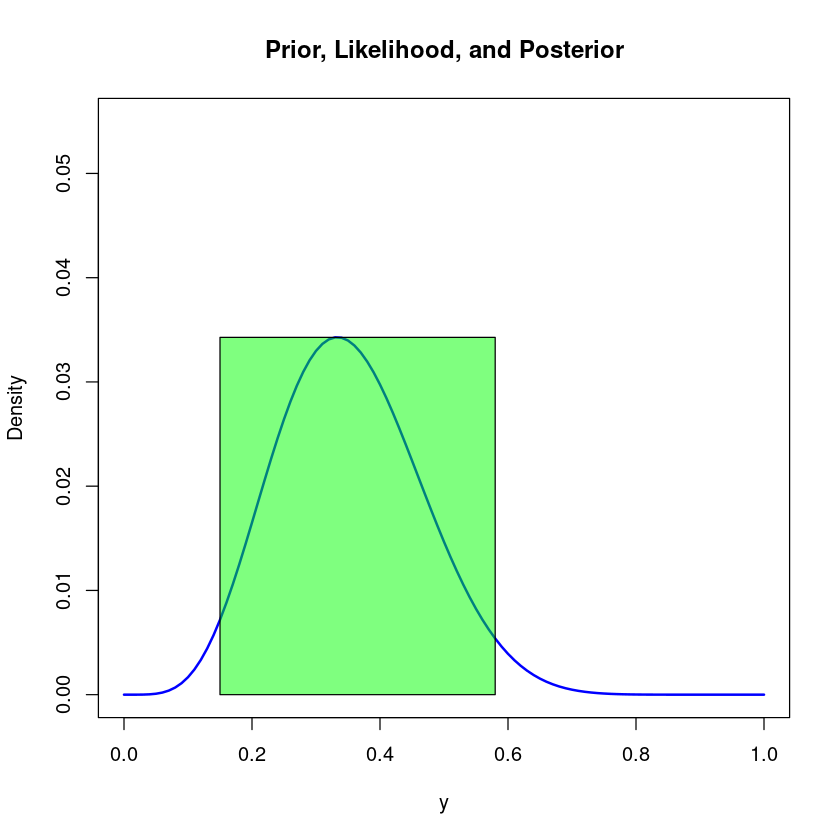

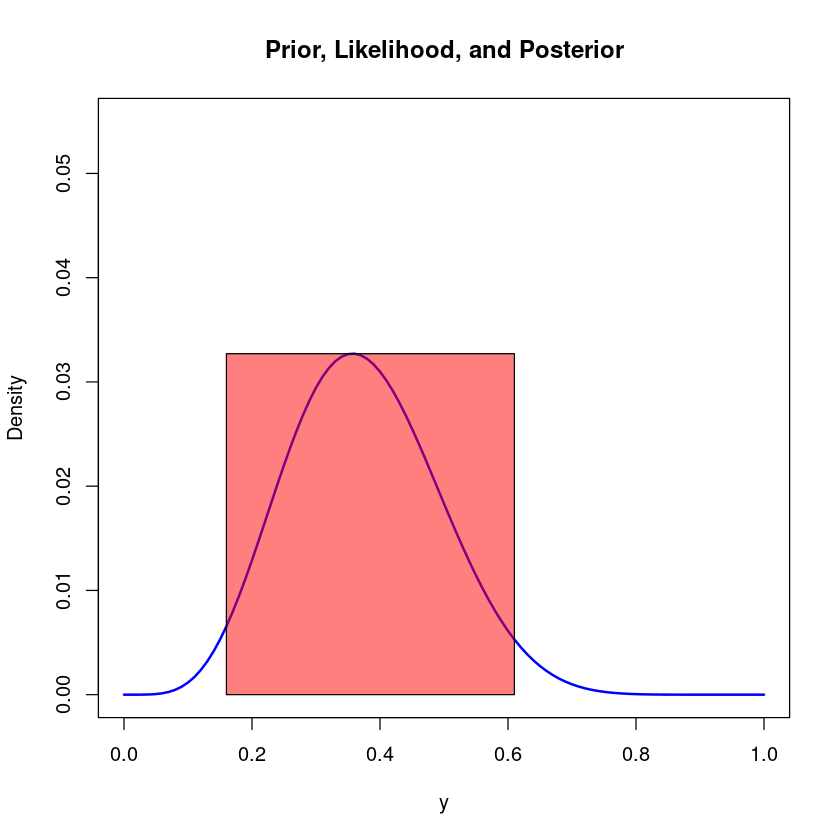

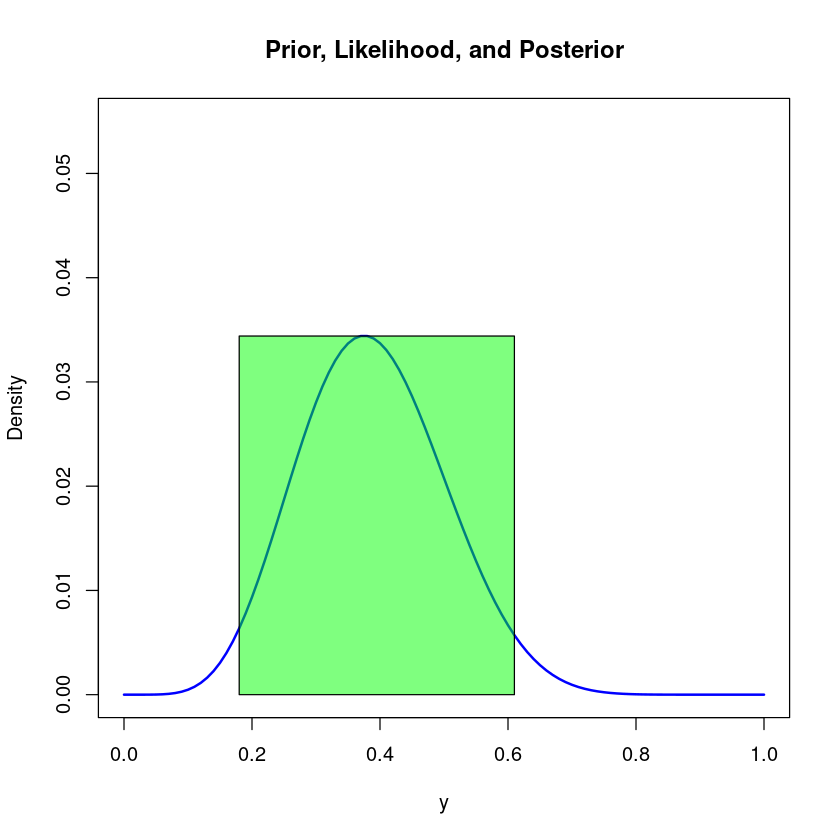

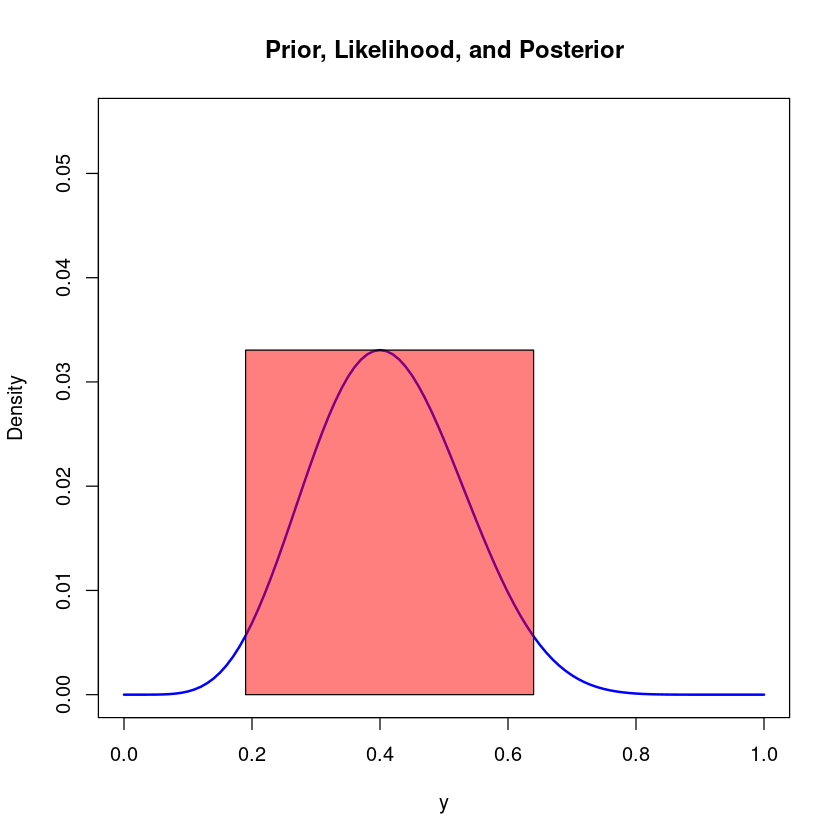

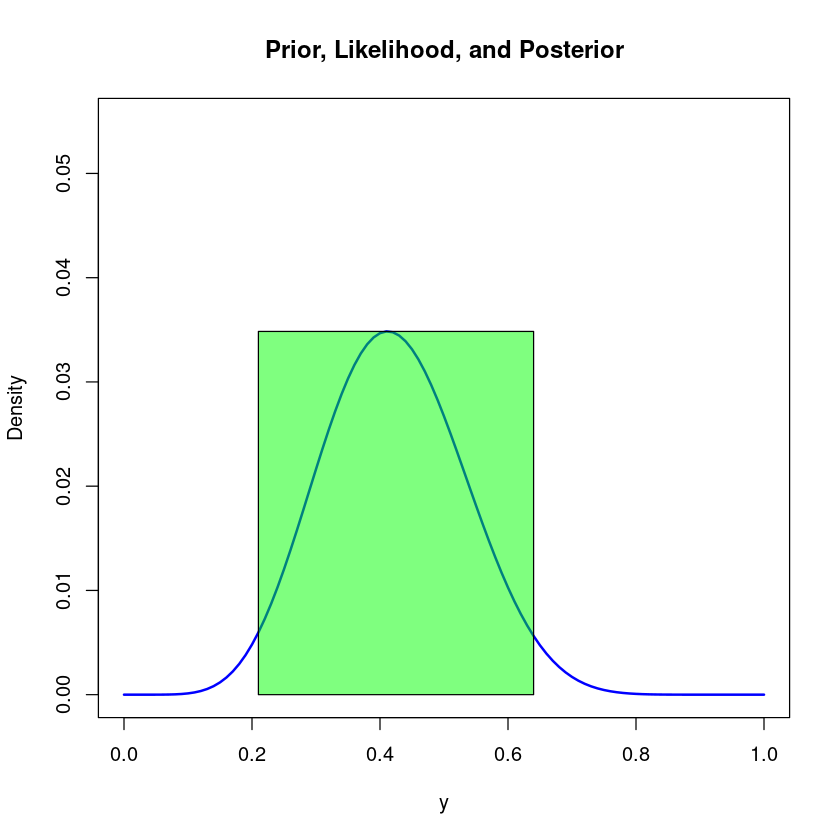

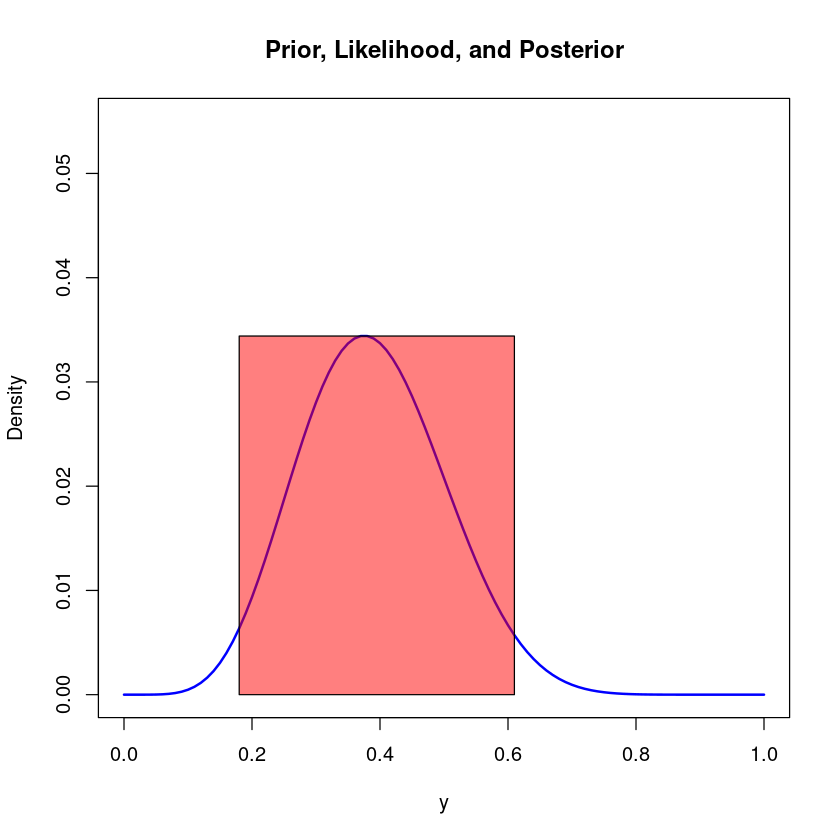

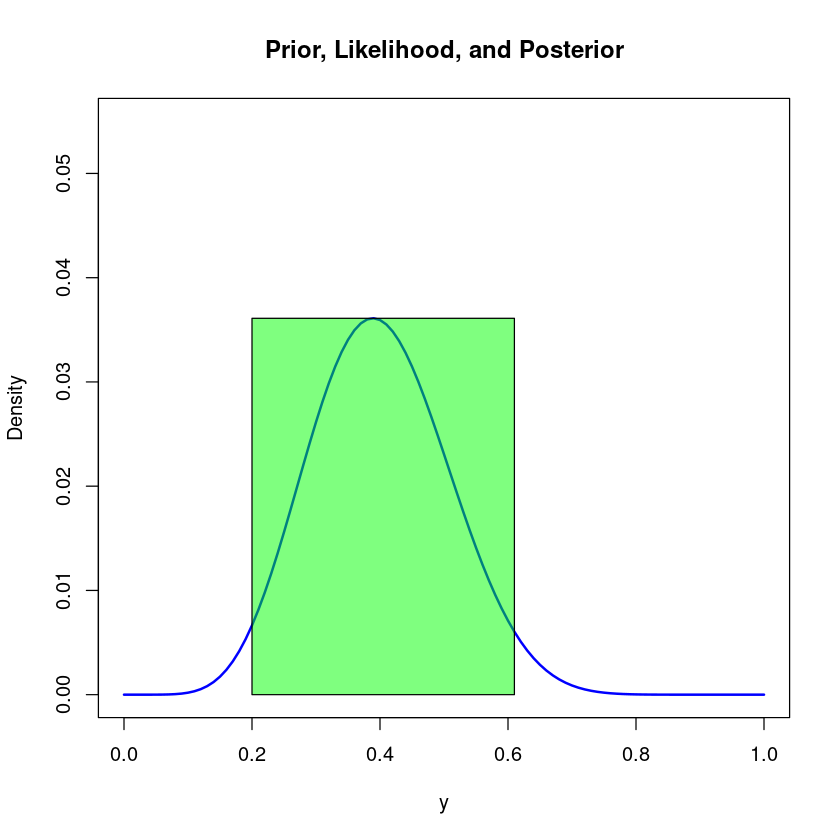

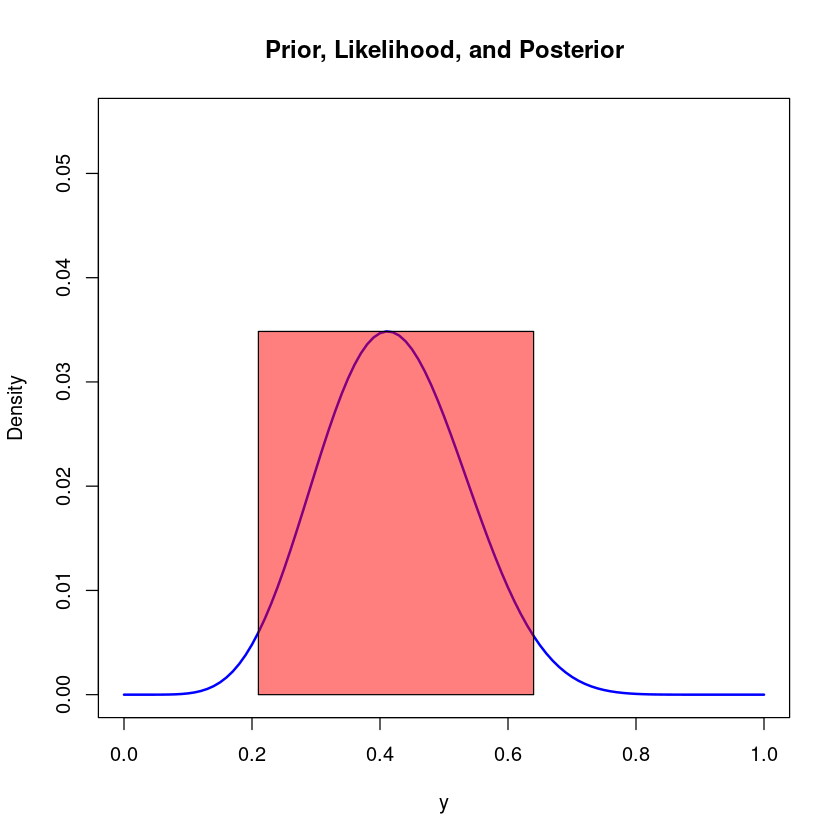

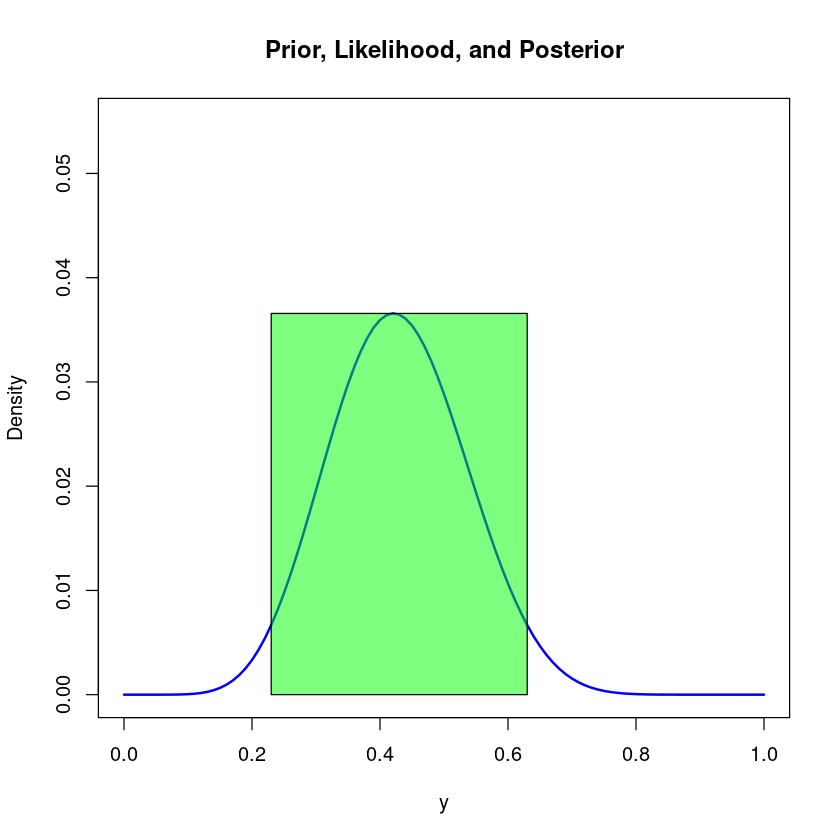

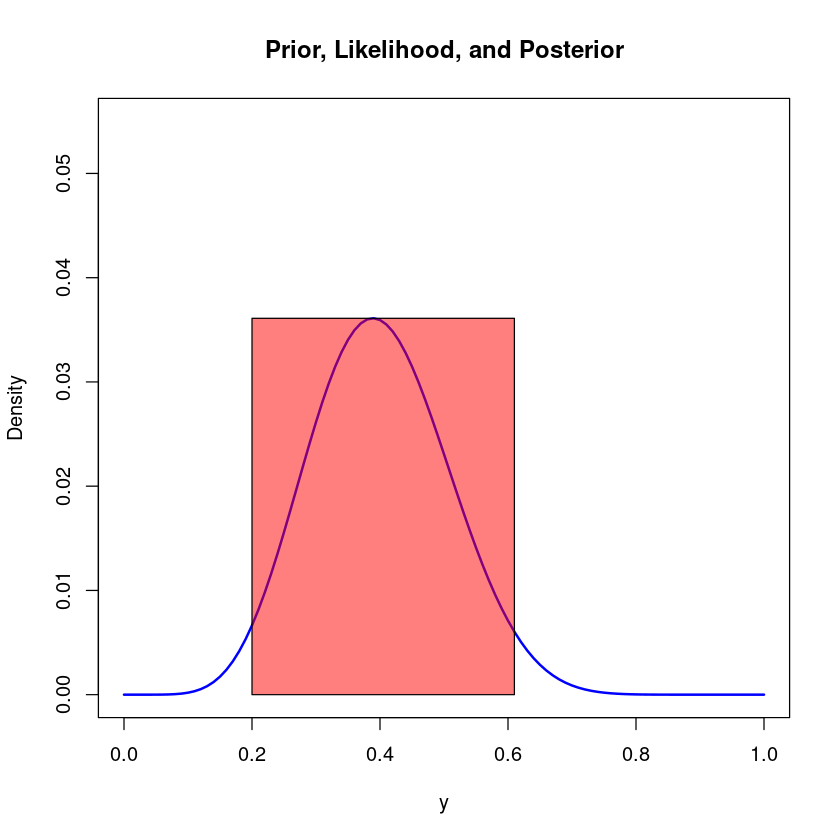

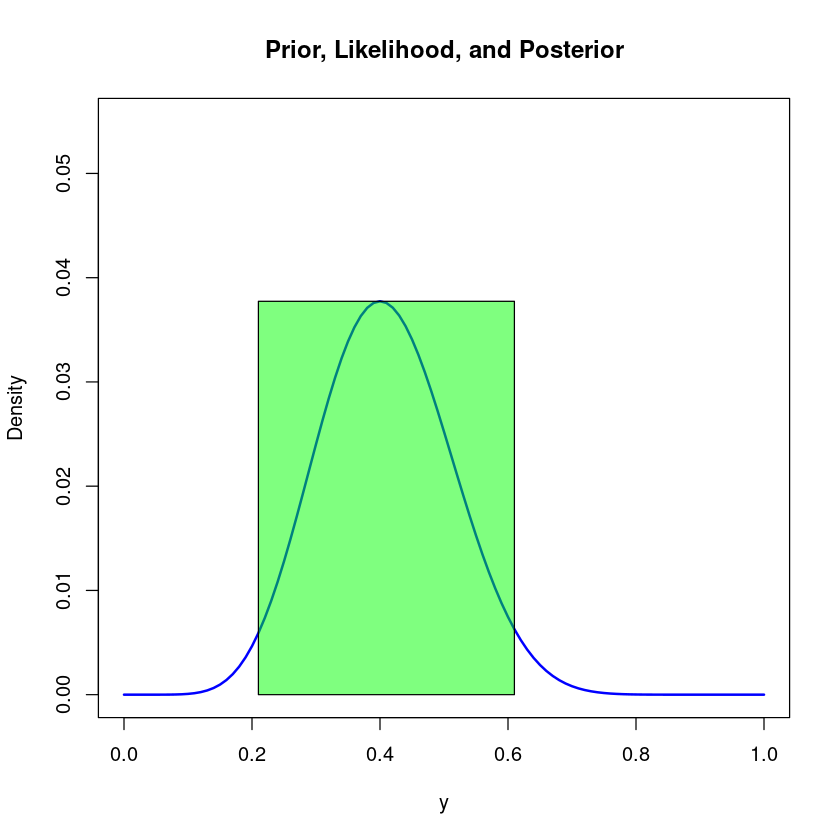

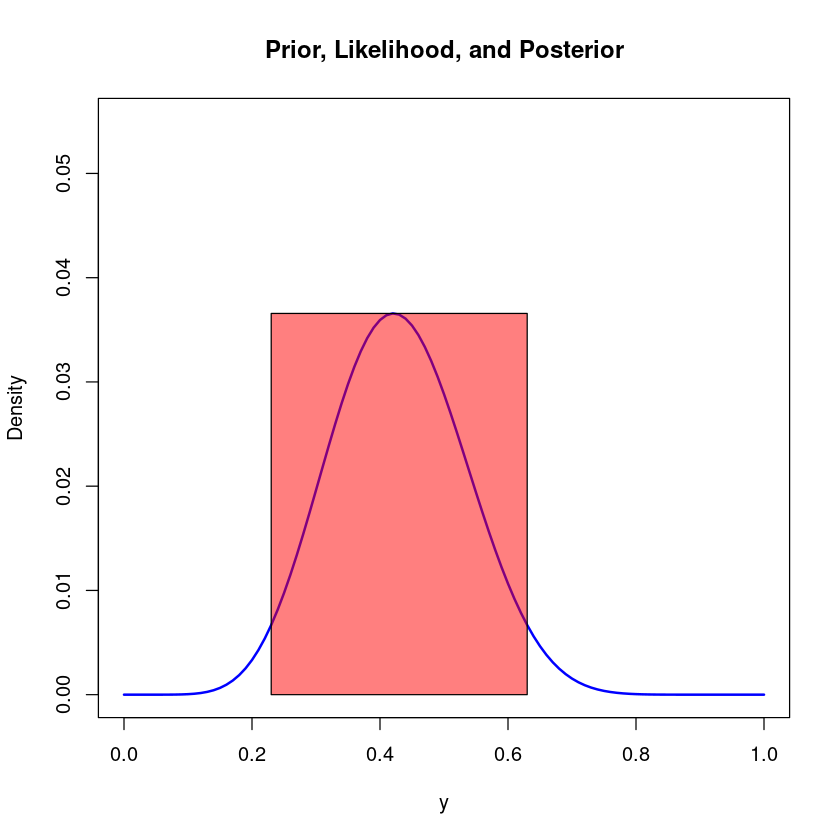

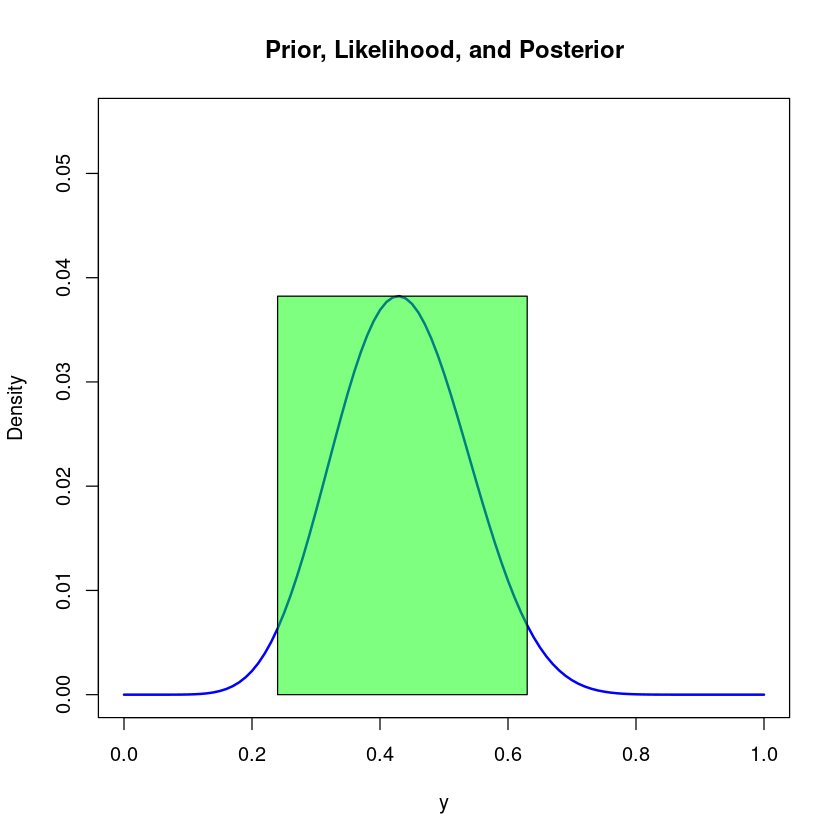

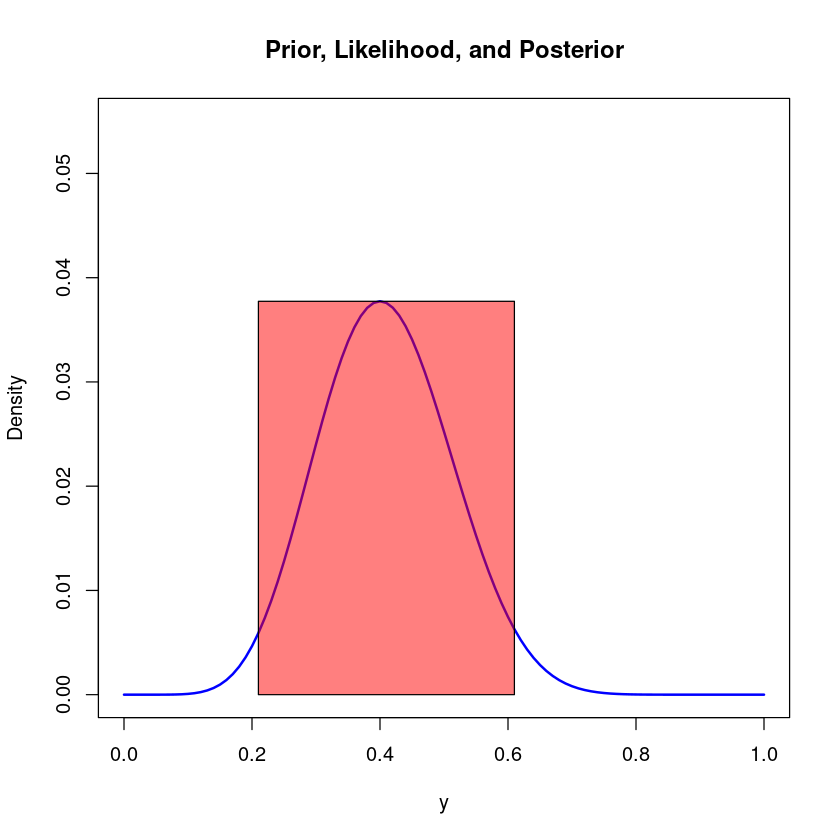

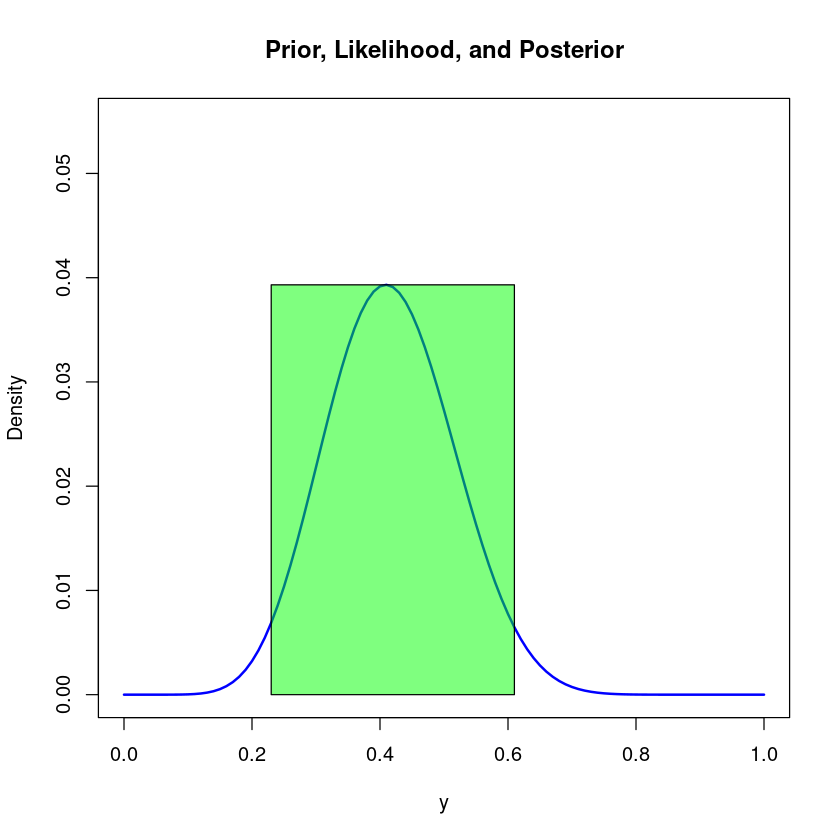

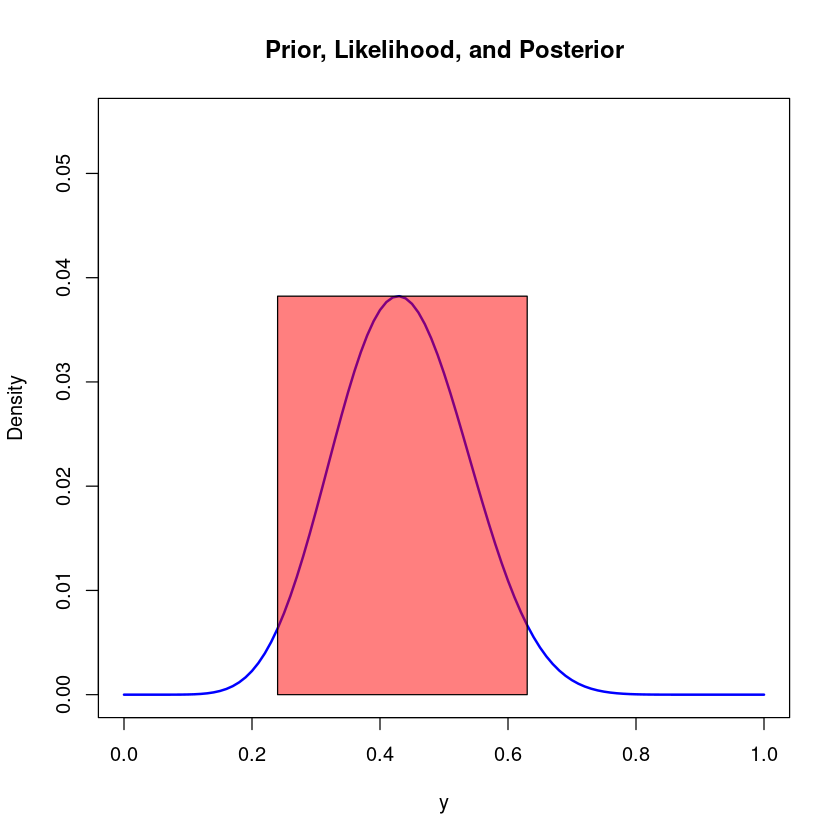

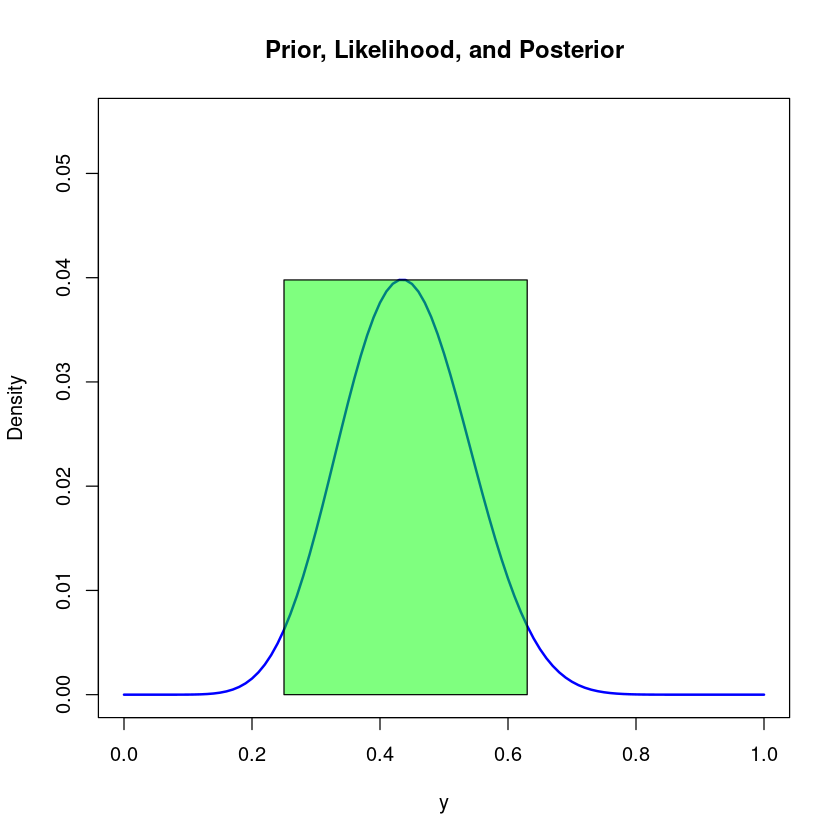

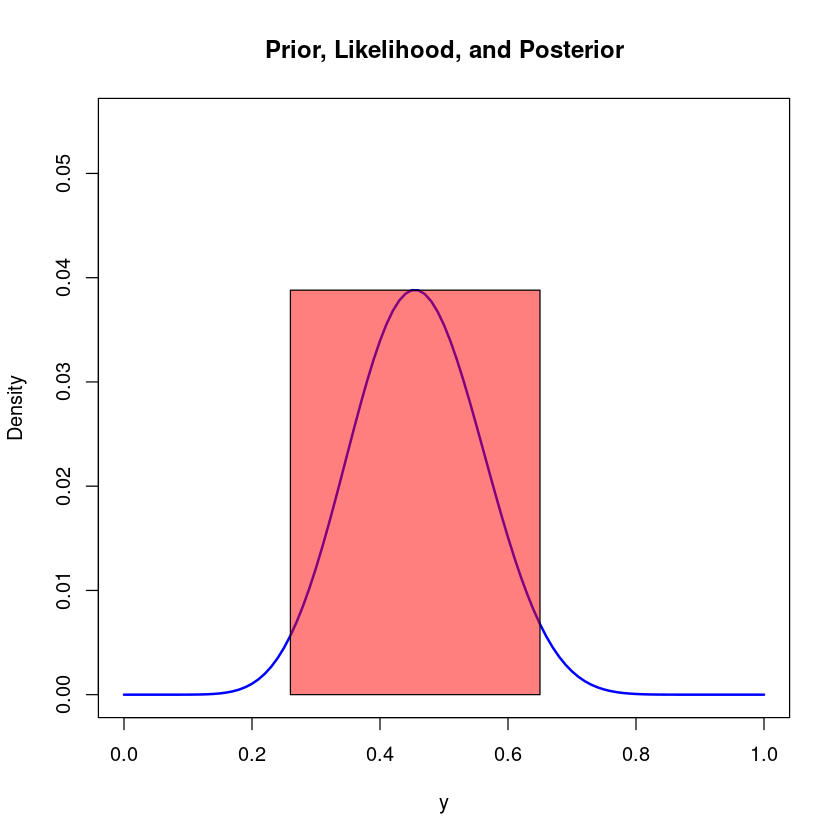

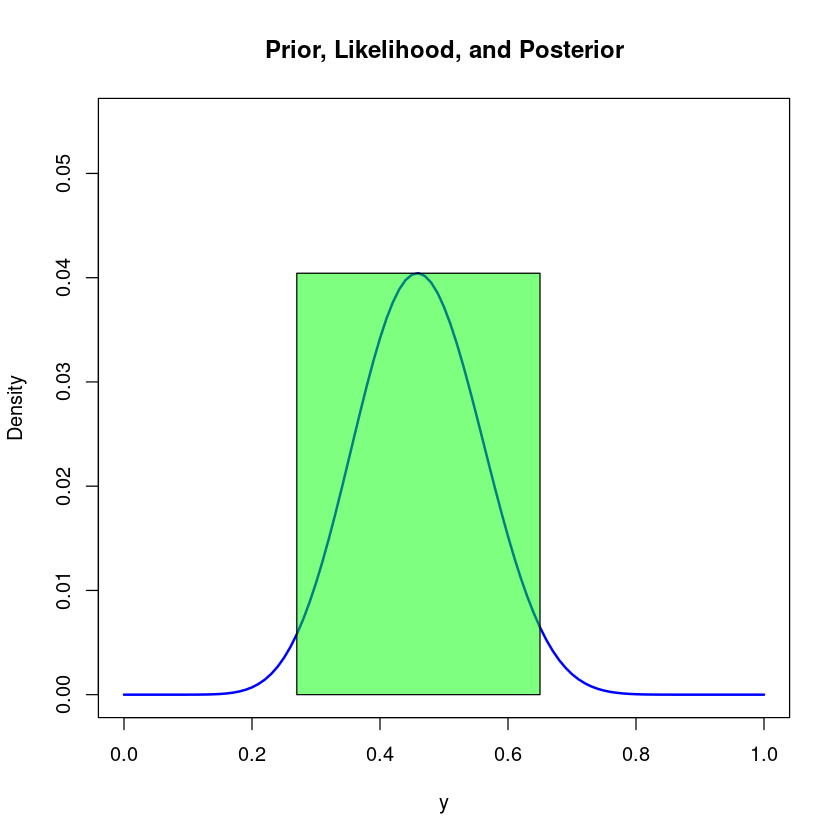

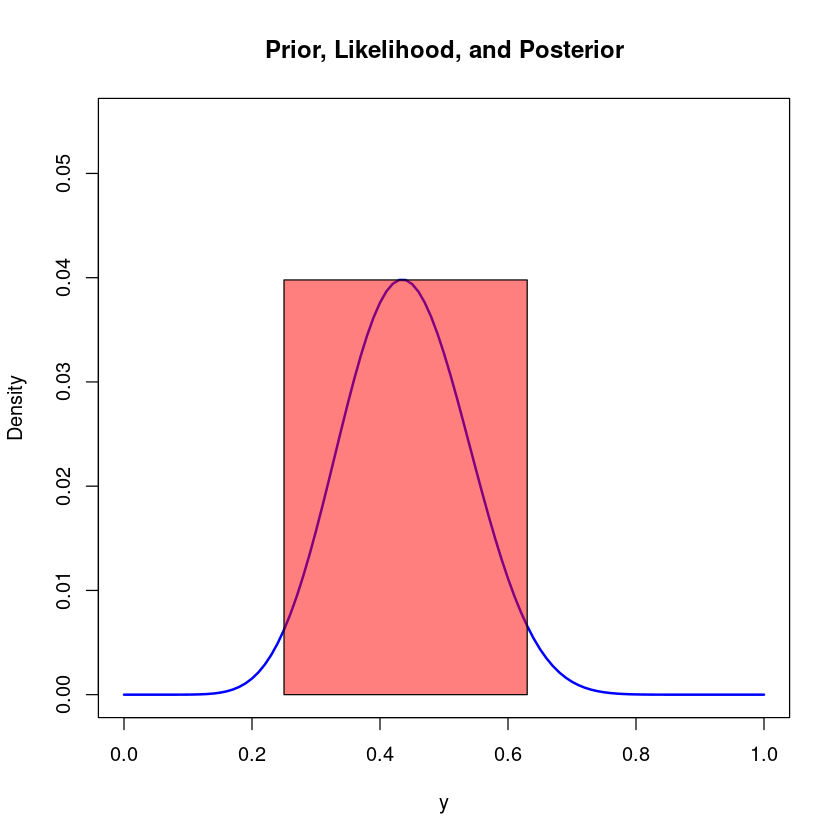

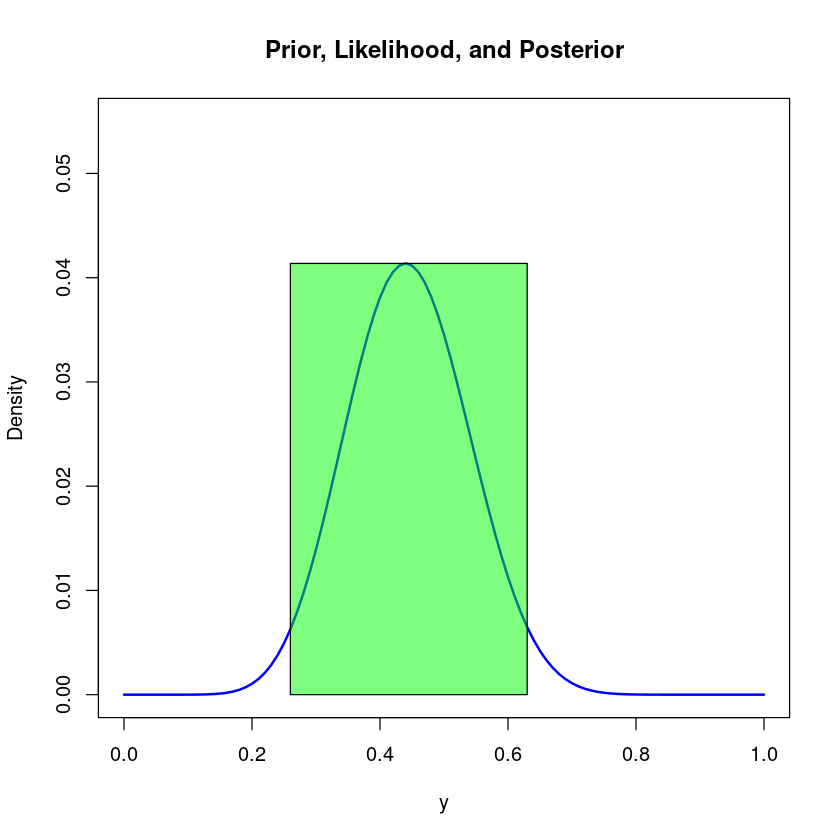

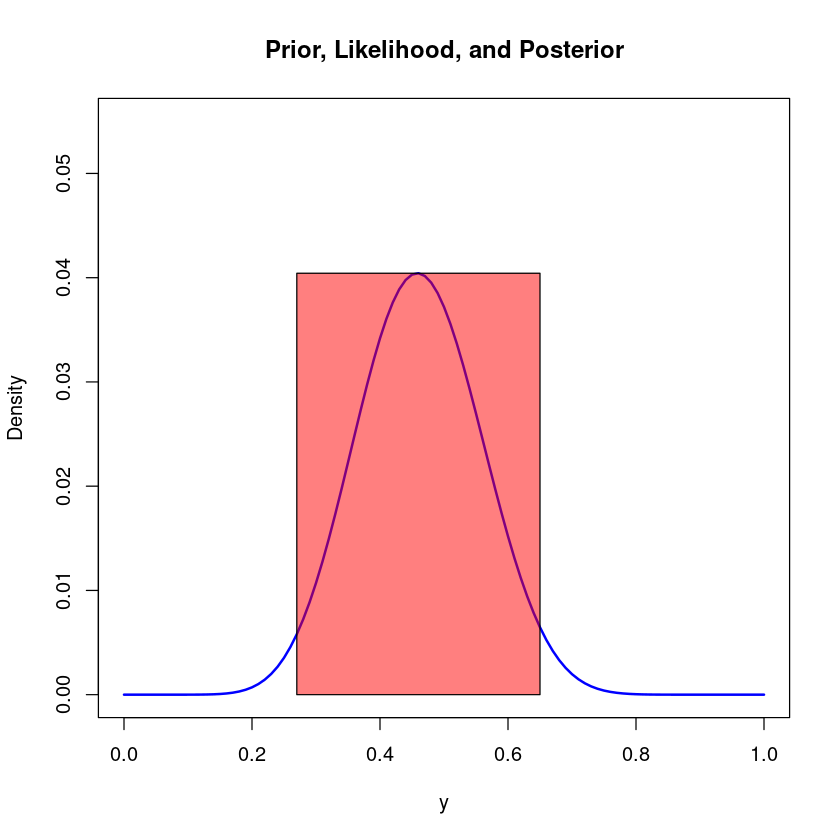

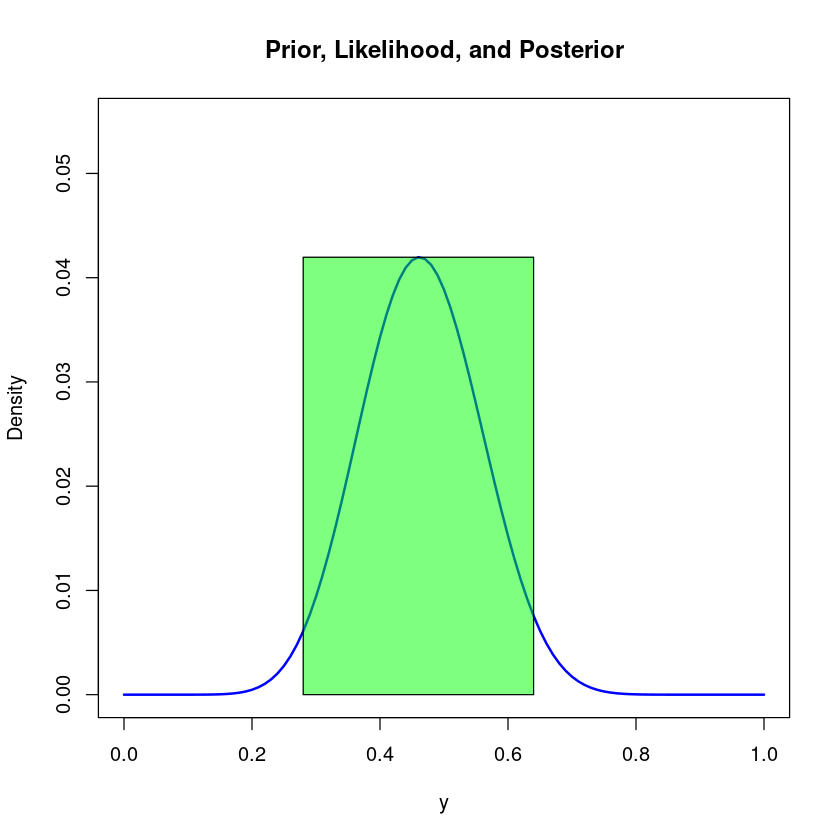

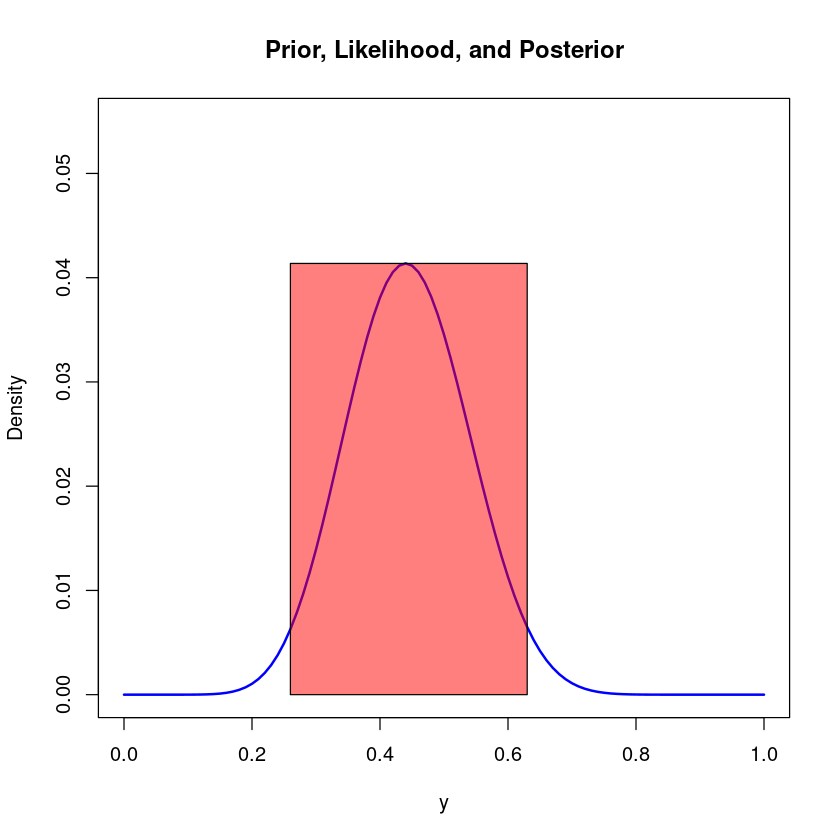

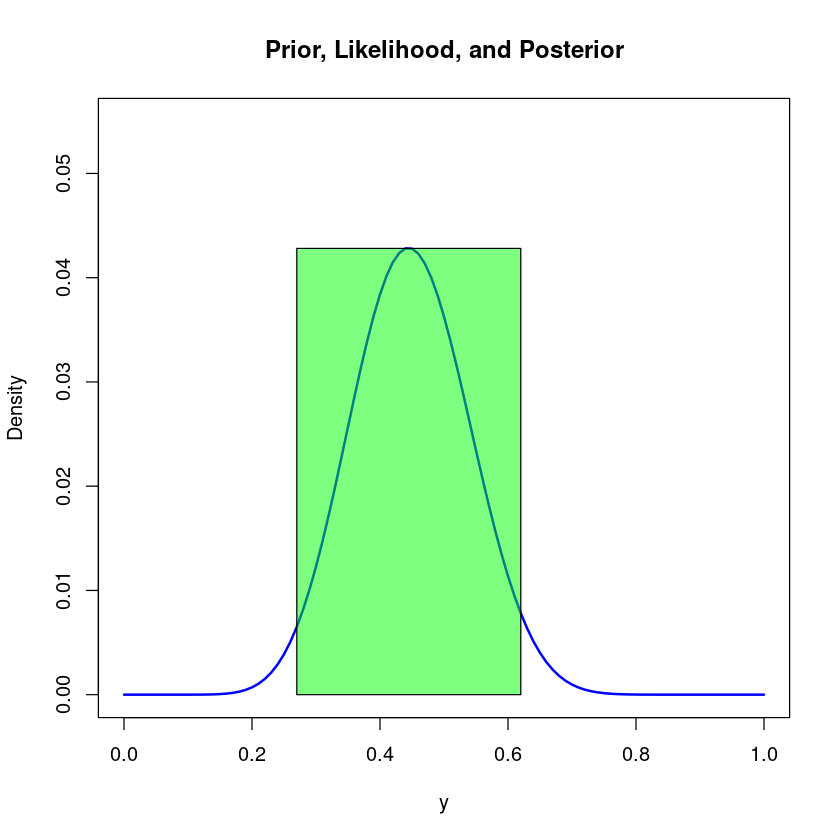

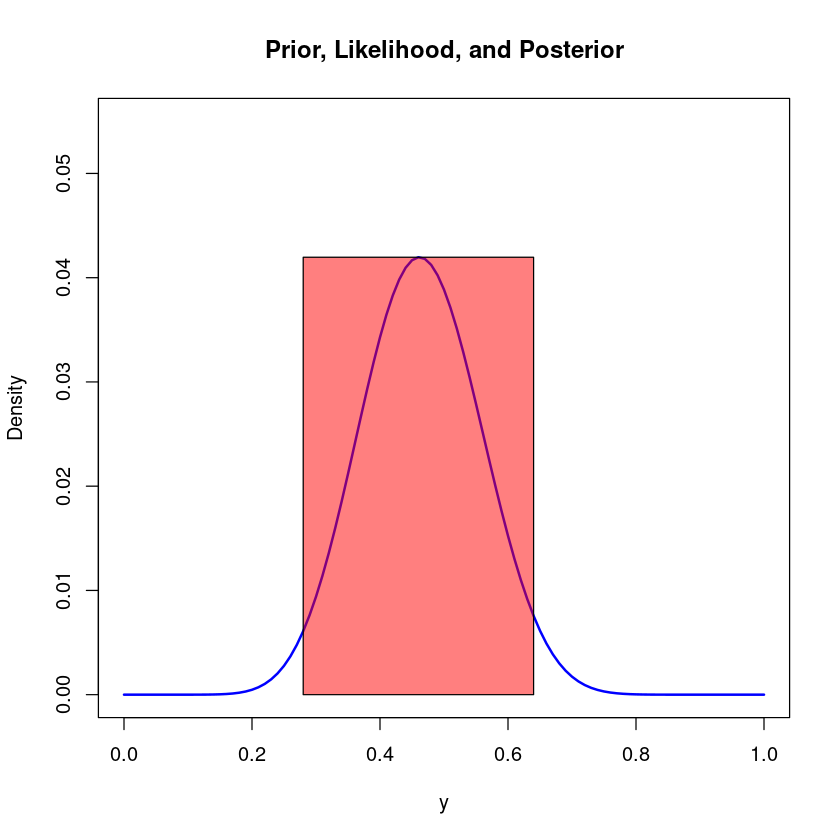

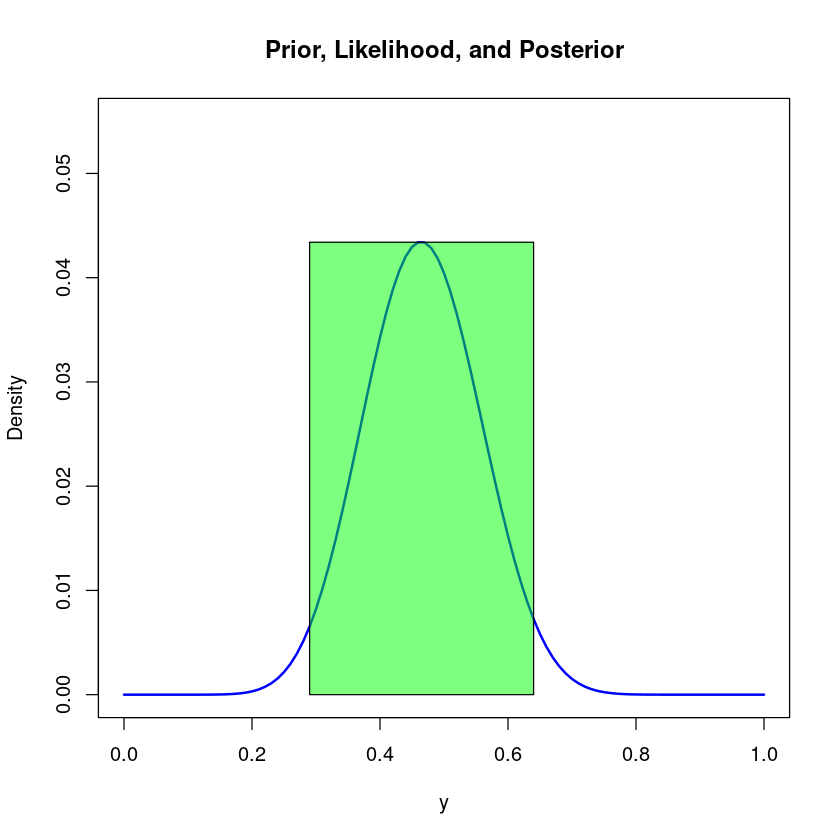

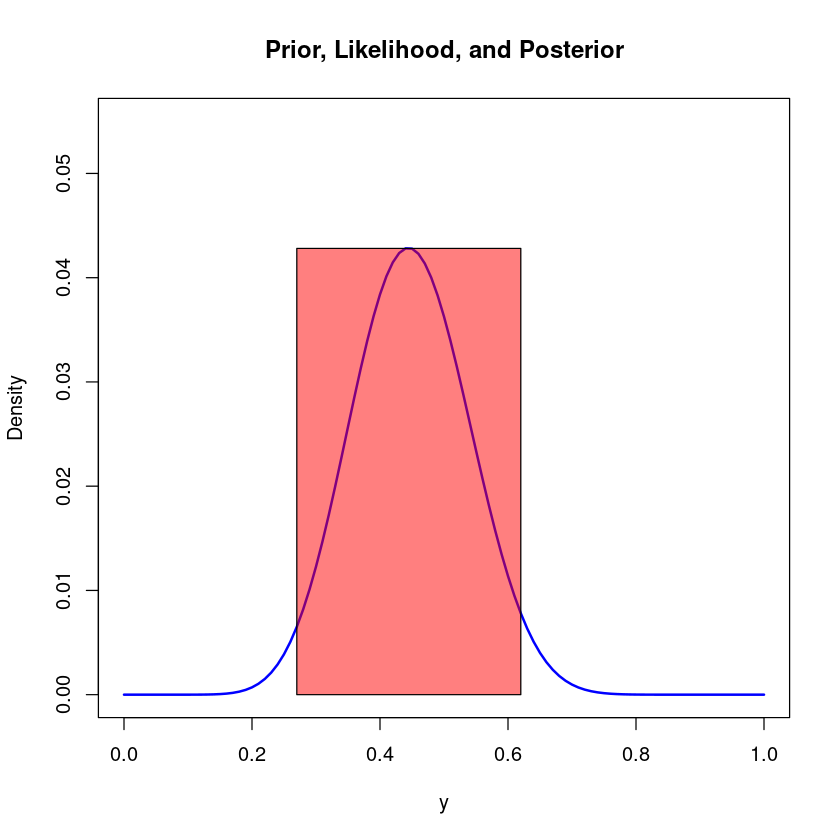

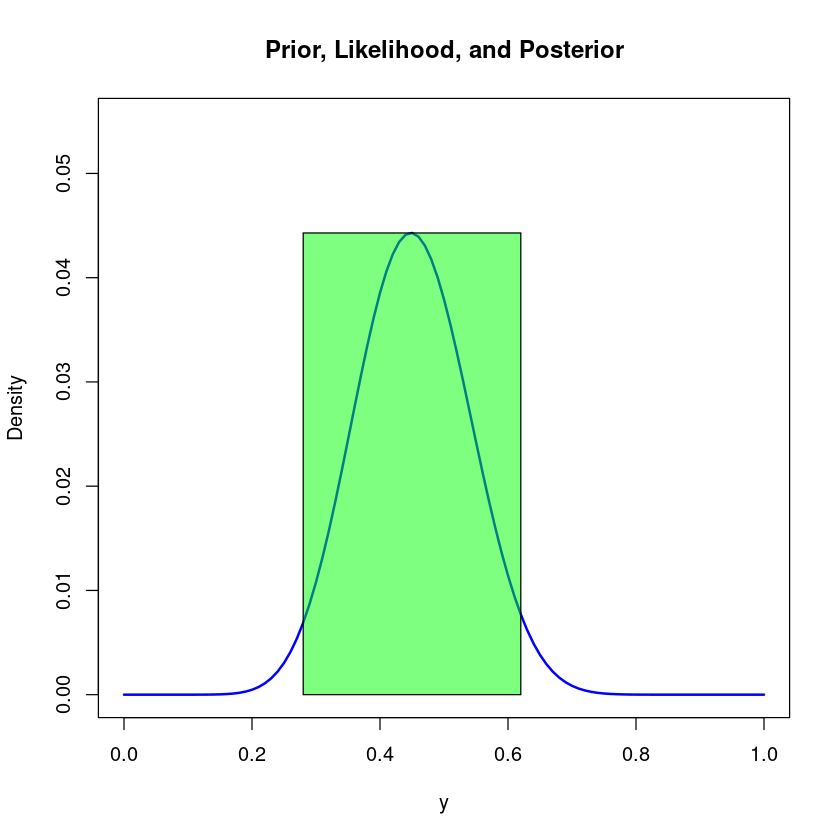

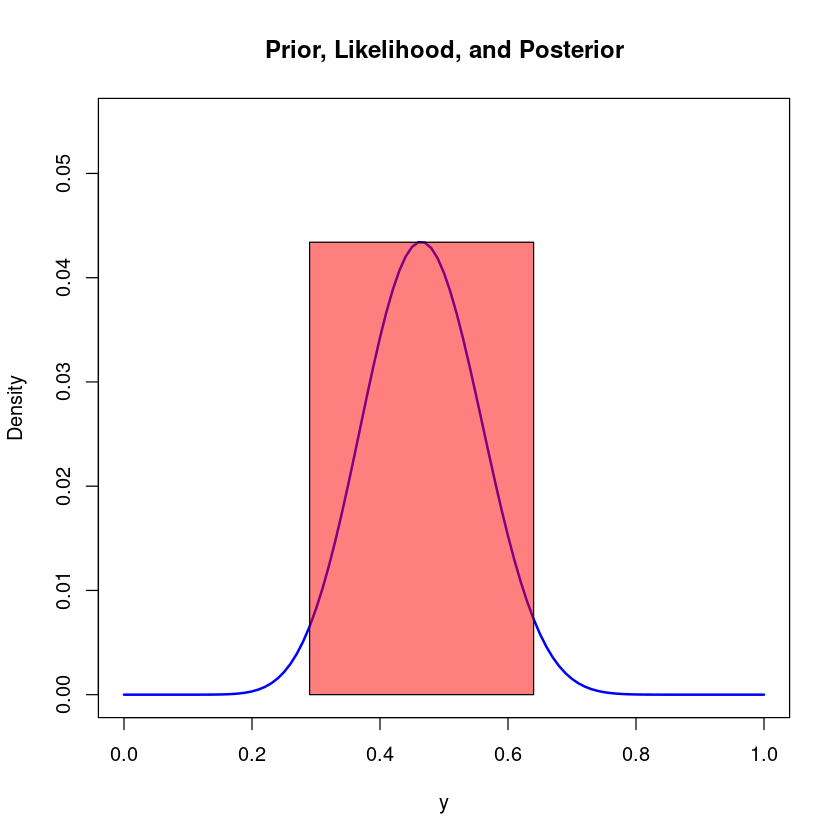

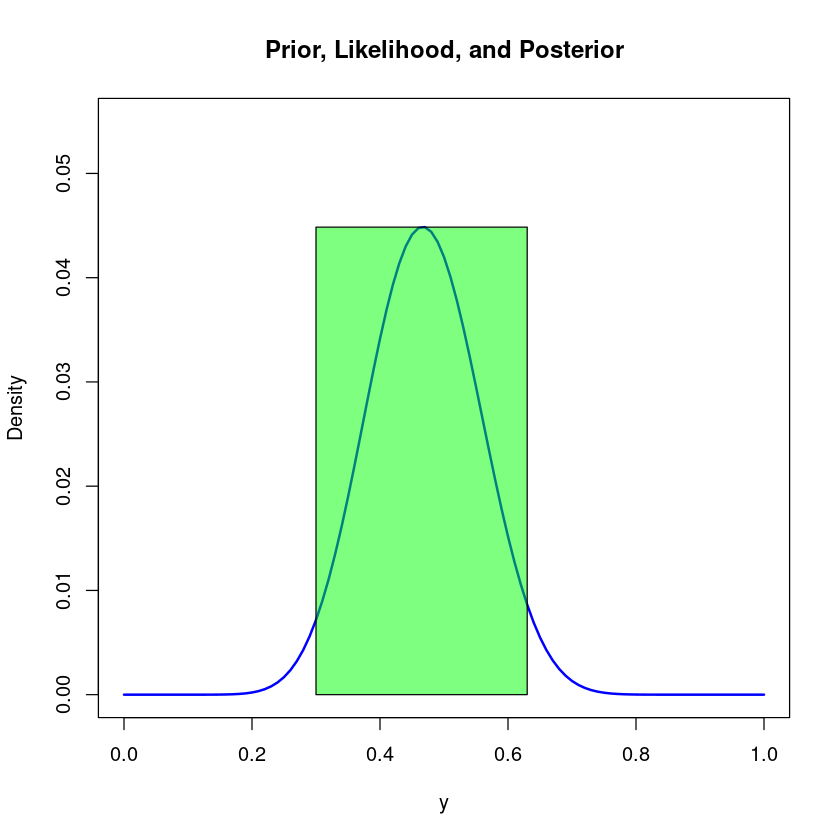

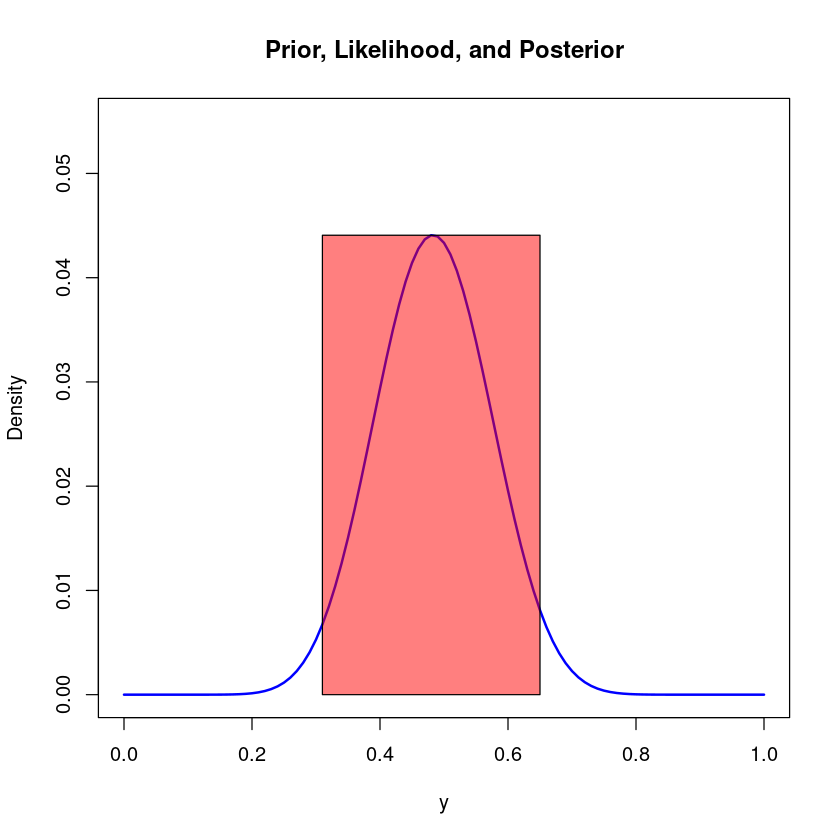

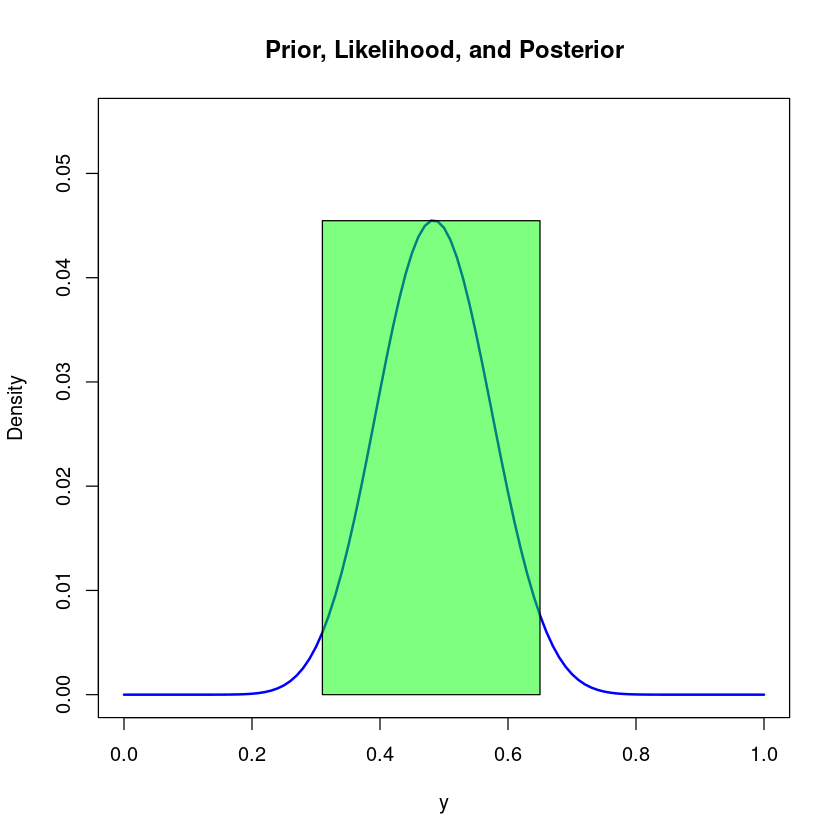

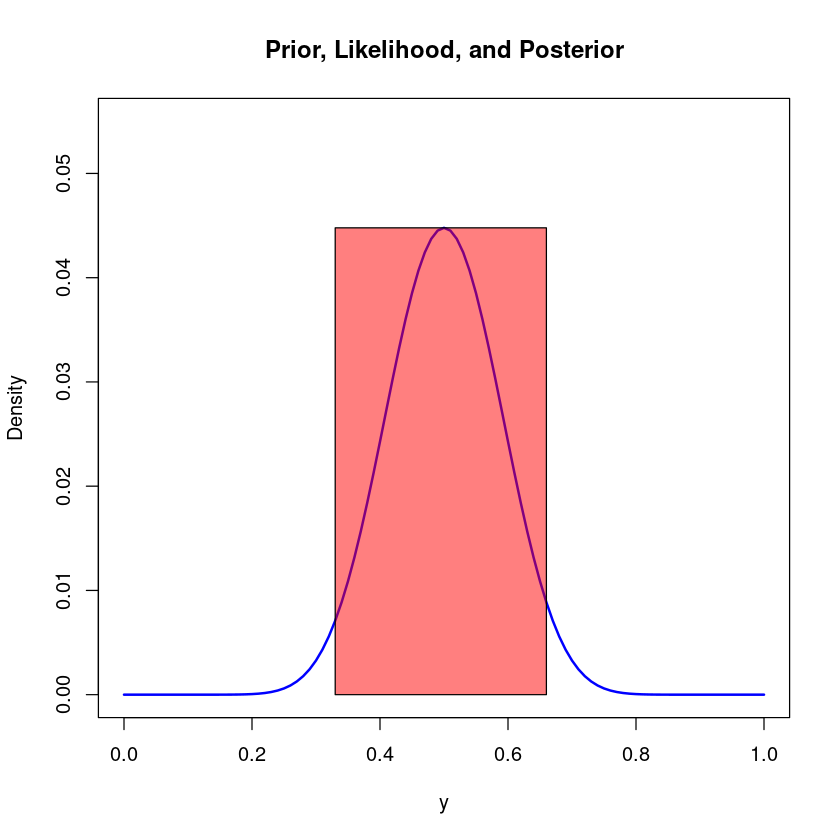

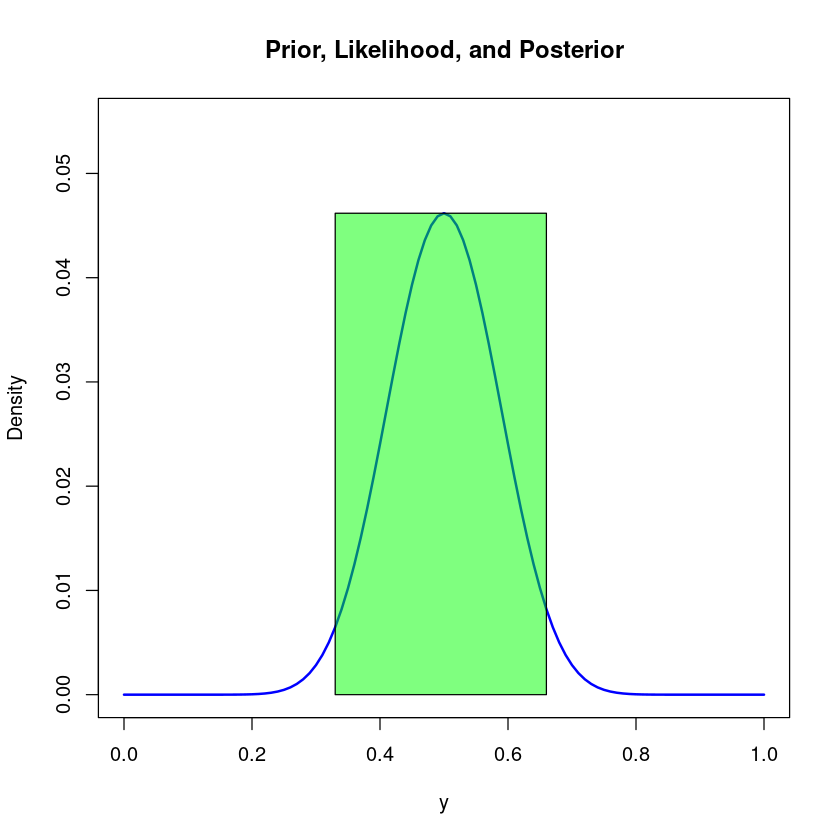

In [29]:
for (i in 1:length(draws)) {
    draws_temp<-draws[1:i]
    n<-length(draws_temp)
    n_heads<-length(draws_temp[draws_temp==0])
    n_tails<-n-n_heads
    y<-seq(0,1,0.01)

    prior_uniform<-dunif(y,min=0,max=n)/sum(dunif(y,min=0,max=n))
    prior_beta<-dbeta(y,shape1 = 2,shape2 = 2)/sum(dbeta(y,shape1 = 2,shape2 = 2))
    likelihood<-dbinom(n_heads,size = n,prob = y)
    posterior_uniform<-likelihood*prior_uniform/sum(likelihood*prior_uniform)
    posterior_beta<-likelihood*prior_beta/sum(likelihood*prior_beta)

    cumsum_uniform<-cumsum(posterior_uniform)
    start_uniform<-y[which.min(abs(cumsum_uniform-0.025))]
    end_uniform<-y[which.min(abs(cumsum_uniform-0.975))]
    cumsum_beta<-cumsum(posterior_beta)
    start_beta<-y[which.min(abs(cumsum_beta-0.025))]
    end_beta<-y[which.min(abs(cumsum_beta-0.975))]

    plot(y, posterior_uniform, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.055))
    rect(col= rgb(1.0,0,0,alpha=0.5),xleft = start_uniform,xright = end_uniform,ybottom = 0,ytop = posterior_uniform[which.max(posterior_uniform)])
    plot(y, posterior_beta, type = "l", col = "blue", lwd = 2, xlab = "y", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.055))
    rect(col= rgb(0,1.0,0,alpha=0.5),xleft = start_beta,xright = end_beta,ybottom = 0,ytop = posterior_beta[which.max(posterior_beta)])
}

### Point 3.d

In [30]:
cat("Uniform prior: ",y[which.max(posterior_uniform)])
cumsum<-cumsum(posterior_uniform)
start<-y[which.min(abs(cumsum-0.025))]
end<-y[which.min(abs(cumsum-0.975))]
cat("\tThe interval of 95% credibility for the uniform prior is: ", start,"-",end,"\n")
cat("Beta prior: ",y[which.max(posterior_beta)])
cumsum<-cumsum(posterior_beta)
start<-y[which.min(abs(cumsum-0.025))]
end<-y[which.min(abs(cumsum-0.975))]
cat("\tThe interval of 95% credibility for the beta prior is: ", start,"-",end)

#the results are the same

Uniform prior:  0.5	The interval of 95% credibility for the uniform prior is:  0.33 - 0.66 
Beta prior:  0.5	The interval of 95% credibility for the beta prior is:  0.33 - 0.66

## Ex 4

### Point 4.a

In [31]:
my_quantile <-function(y,posterior,value){
    return (y[which.min(abs(cumsum(posterior)-value))])
}

data<-c(57,31,45,67)
previous_data<-c(32,14,26,28)
n<-length(data)
y<-seq(0,1,0.001)

prior_uniform<-dunif(y,min = 0,max = 1)/sum(dunif(y,min = 0,max = 1))
likelihood_previous_a<-dbinom(x = 32,size = 100,prob = y)
likelihood_previous_b<-dbinom(x = 14,size = 100,prob = y)
likelihood_previous_c<-dbinom(x = 26,size = 100,prob = y)
likelihood_previous_d<-dbinom(x = 28,size = 100,prob = y)
prior_previous_a<-prior_uniform*likelihood_previous_a/sum(prior_uniform*likelihood_previous_a)
prior_previous_b<-prior_uniform*likelihood_previous_b/sum(prior_uniform*likelihood_previous_b)
prior_previous_c<-prior_uniform*likelihood_previous_c/sum(prior_uniform*likelihood_previous_c)
prior_previous_d<-prior_uniform*likelihood_previous_d/sum(prior_uniform*likelihood_previous_d)

likelihood_a<-dbinom(x = 57,size = 200,prob = y)
likelihood_b<-dbinom(x = 31,size = 200,prob = y)
likelihood_c<-dbinom(x = 45,size = 200,prob = y)
likelihood_d<-dbinom(x = 67,size = 200,prob = y)

# plot(y,likelihood_a)
# plot(y,likelihood_b)
# plot(y,likelihood_c)
# plot(y,likelihood_d)

norm_uniform_a<-sum(prior_uniform*likelihood_a)
norm_uniform_b<-sum(prior_uniform*likelihood_b)
norm_uniform_c<-sum(prior_uniform*likelihood_c)
norm_uniform_d<-sum(prior_uniform*likelihood_d)
norm_previous_a<-sum(prior_previous_a*likelihood_a)
norm_previous_b<-sum(prior_previous_b*likelihood_b)
norm_previous_c<-sum(prior_previous_c*likelihood_c)
norm_previous_d<-sum(prior_previous_d*likelihood_d)

posterior_uniform_a<-prior_uniform*likelihood_a/norm_uniform_a
posterior_uniform_b<-prior_uniform*likelihood_b/norm_uniform_b
posterior_uniform_c<-prior_uniform*likelihood_c/norm_uniform_c
posterior_uniform_d<-prior_uniform*likelihood_d/norm_uniform_d
posterior_previous_a<-prior_previous_a*likelihood_a/norm_previous_a
posterior_previous_b<-prior_previous_b*likelihood_b/norm_previous_b
posterior_previous_c<-prior_previous_c*likelihood_c/norm_previous_c
posterior_previous_d<-prior_previous_d*likelihood_d/norm_previous_d

# plot(y,posterior_uniform_a)
# plot(y,posterior_uniform_b)
# plot(y,posterior_uniform_c)
# plot(y,posterior_uniform_d)

percentages<-c(y[which.max(posterior_uniform_a)],y[which.max(posterior_uniform_b)],y[which.max(posterior_uniform_c)],y[which.max(posterior_uniform_d)])*100
lower_value<-c(my_quantile(y=y,posterior=posterior_uniform_a,value=0.16),my_quantile(y=y,posterior=posterior_uniform_b,value=0.16),my_quantile(y=y,posterior=posterior_uniform_c,value=0.16),my_quantile(y=y,posterior=posterior_uniform_d,value=0.16))*100
higher_value<-c(my_quantile(y=y,posterior=posterior_uniform_a,value=0.84),my_quantile(y=y,posterior=posterior_uniform_b,value=0.84),my_quantile(y=y,posterior=posterior_uniform_c,value=0.84),my_quantile(y=y,posterior=posterior_uniform_d,value=0.84))*100
df<-data.frame(percentages,lower_value,higher_value)
dimnames(df)[[1]]<-c("A","B","C","D")
cat("Uniform prior\n")
print(df)

percentages<-c(y[which.max(posterior_previous_a)],y[which.max(posterior_previous_b)],y[which.max(posterior_previous_c)],y[which.max(posterior_previous_d)])*100
lower_value<-c(my_quantile(y=y,posterior=posterior_previous_a,value=0.16),my_quantile(y=y,posterior=posterior_previous_b,value=0.16),my_quantile(y=y,posterior=posterior_previous_c,value=0.16),my_quantile(y=y,posterior=posterior_previous_d,value=0.16))*100
higher_value<-c(my_quantile(y=y,posterior=posterior_previous_a,value=0.84),my_quantile(y=y,posterior=posterior_previous_b,value=0.84),my_quantile(y=y,posterior=posterior_previous_c,value=0.84),my_quantile(y=y,posterior=posterior_previous_d,value=0.84))*100
df<-data.frame(percentages,lower_value,higher_value)
dimnames(df)[[1]]<-c("A","B","C","D")
cat("Previous poll prior\n")
print(df)

Uniform prior
  percentages lower_value higher_value
A        28.5        25.5         31.8
B        15.5        13.2         18.3
C        22.5        19.8         25.7
D        33.5        30.3         36.9
Previous poll prior
  percentages lower_value higher_value
A        29.7        27.1         32.4
B        15.0        13.1         17.2
C        23.7        21.4         26.2
D        31.7        29.1         34.4


### Point 4.d

In [32]:
library(Hmisc)
# calculate std


std_a=sqrt(wtd.var(y,posterior_previous_a,normwt=TRUE))
std_b=sqrt(wtd.var(y,posterior_previous_b,normwt=TRUE))
std_c=sqrt(wtd.var(y,posterior_previous_c,normwt=TRUE))
std_d=sqrt(wtd.var(y,posterior_previous_d,normwt=TRUE))


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [33]:
# calculate sample sizes
sample_size=sum(data)
sample_size_a=round(sample_size*(1*std_a/0.03)**2)
sample_size_b=round(sample_size*(1*std_b/0.03)**2)
sample_size_c=round(sample_size*(1*std_c/0.03)**2)
sample_size_d=round(sample_size*(1*std_d/0.03)**2)

cat("\nThe sample size needed to get +-3% confidence interval for party A is: ", sample_size_a)
cat("\nThe sample size needed to get +-3% confidence interval for party B is: ", sample_size_b)
cat("\nThe sample size needed to get +-3% confidence interval for party C is: ", sample_size_c)
cat("\nThe sample size needed to get +-3% confidence interval for party D is: ", sample_size_d)

cat("\n\n")
cat("So the sample size needed to have +-3% for every party is: ", max(c(sample_size_a,sample_size_b,sample_size_c,sample_size_d)))


The sample size needed to get +-3% confidence interval for party A is:  155
The sample size needed to get +-3% confidence interval for party B is:  96
The sample size needed to get +-3% confidence interval for party C is:  135
The sample size needed to get +-3% confidence interval for party D is:  161

So the sample size needed to have +-3% for every party is:  161